<a href="https://colab.research.google.com/github/juanpajedrez/FreeCodeCamp-MLforEverybody/blob/main/dcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from imblearn.over_sampling import  RandomOverSampler


warnings.filterwarnings('ignore')

### Lets read the data
Lets access the data that we are gonna be working on in order to practice machine learning from:
https://www.youtube.com/watch?v=i_LwzRVP7bg&t=246s&ab_channel=freeCodeCamp.org


### Dataset:
The dataset we getting is a binary classification problem to see telescope space data to see weather a gamma or hadron particle was being sensed by the telescope: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope


In [2]:
# Lets obtain the dataset
data_path = Path("sample_data").joinpath("magic04.data")
print(data_path.exists())

True


In [3]:
# Columns dont exist in dataset, we need to set them up
cols = ["fLength", "fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df_raw_data = pd.read_csv(data_path, names = cols)
print(df_raw_data.head())

# Convert the label class from labels to numbers
df_raw_data["class"] = df_raw_data["class"].map({"g": 1, "h": 0})

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  


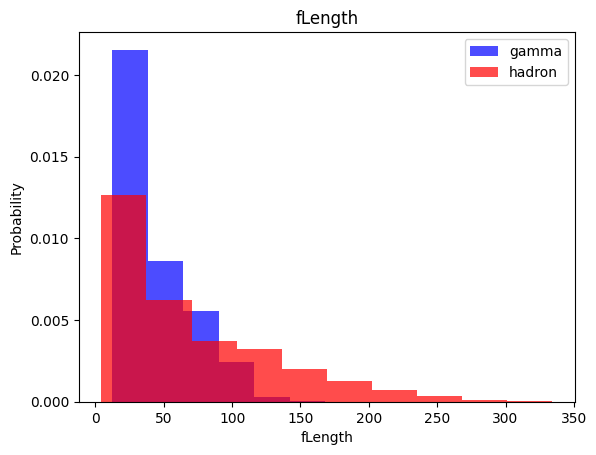

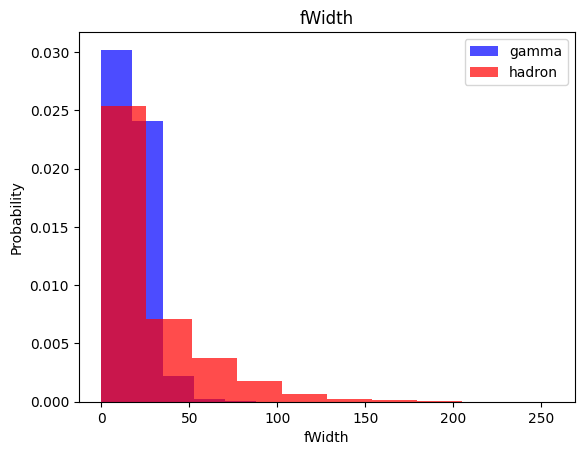

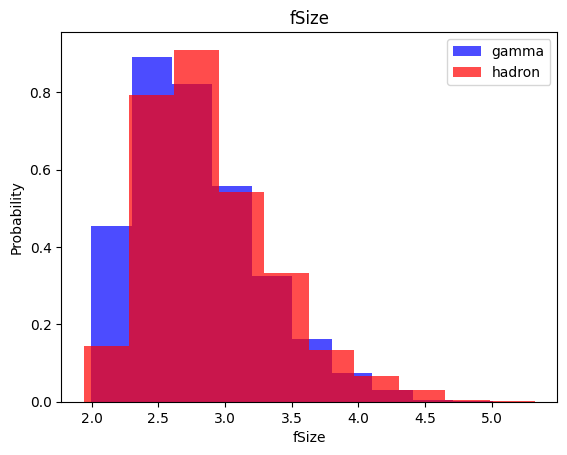

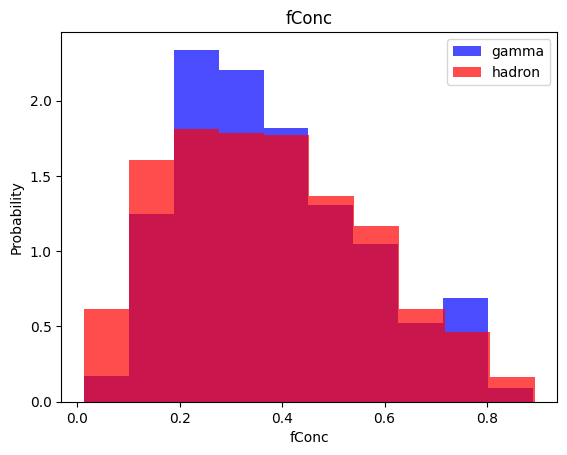

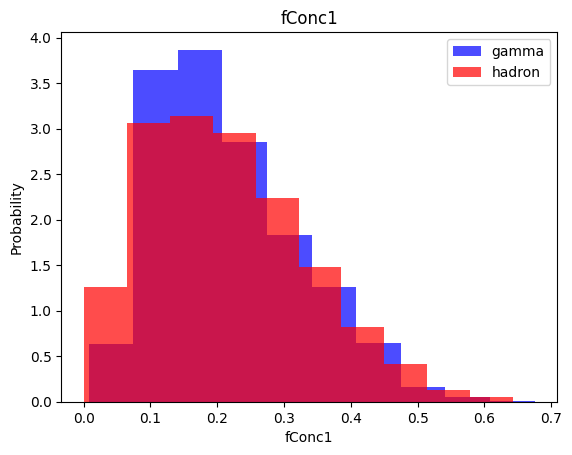

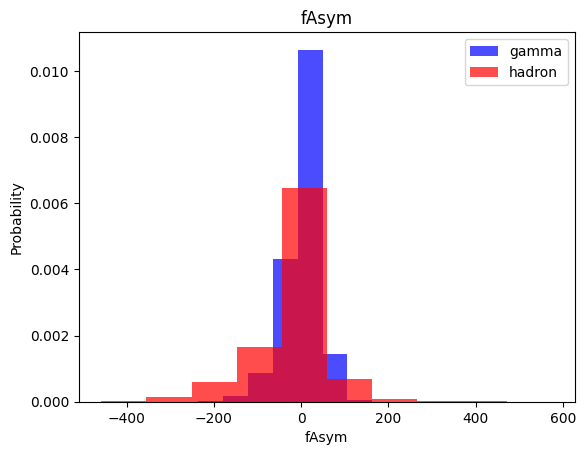

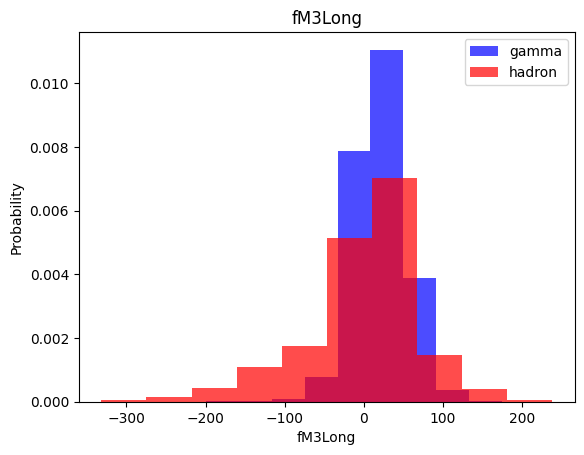

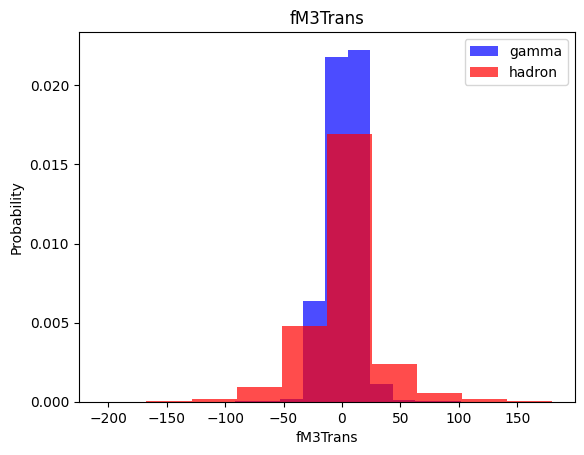

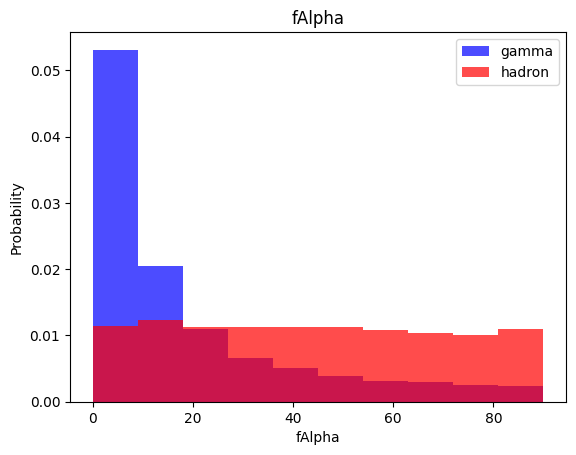

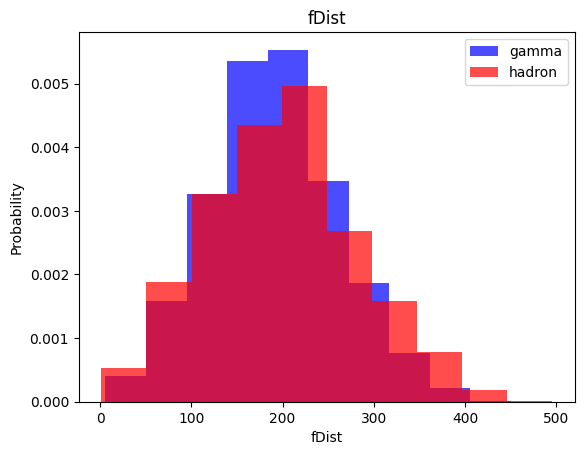

In [4]:
for label in cols[:-1]:
  plt.hist(df_raw_data[df_raw_data["class"] == 1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
  plt.hist(df_raw_data[df_raw_data["class"] == 0][label], color = "red", label = "hadron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

### Train, Validation, Test

In [5]:
# Split the data properly using np.split
train, valid, test = np.split(df_raw_data.sample(frac = 1), [int(0.6*len(df_raw_data)), int(0.8*len(df_raw_data))])

### Data Preprocessing: Z-score

In [6]:
# Import the standardscaler for z-score standardization
from sklearn.preprocessing import StandardScaler
def scale_dataset(dataframe:pd.DataFrame, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data  = np.hstack((X, y.reshape(-1, 1)))
  return data, X, y

In [7]:
train, X_train, y_train = scale_dataset(train, oversample = True)
print(train.shape)
print(X_train.shape)
print(y_train.shape)

(14896, 11)
(14896, 10)
(14896,)


In [8]:
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
print(valid.shape)
print(X_valid.shape)
print(y_valid.shape)

(3804, 11)
(3804, 10)
(3804,)


In [9]:
test, X_test, y_test = scale_dataset(test, oversample = False)
print(test.shape)
print(X_test.shape)
print(y_test.shape)

(3804, 11)
(3804, 10)
(3804,)


### KNN: We would use scikit-learn

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn_model.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1369
           1       0.85      0.86      0.86      2435

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.80      3804
weighted avg       0.81      0.81      0.81      3804



### Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [16]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.52      1369
           1       0.73      0.90      0.81      2435

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804



### Log Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [19]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1369
           1       0.84      0.83      0.83      2435

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



### SVM

In [20]:
from sklearn.svm import SVC

In [21]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [22]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1369
           1       0.89      0.89      0.89      2435

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Net: Using TensorFlow

In [23]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [24]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
  ax1.plot(history.history["loss"], label = "loss")
  ax1.plot(history.history["val_loss"], label = "val_loss")
  ax1.set_xlabel("Epoch")
  ax1.set_ylabel("Binary crossentropy")
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history["accuracy"], label = "accuracy")
  ax2.plot(history.history["val_accuracy"], label = "val_accuracy")
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("Accuracy")
  ax2.legend()
  ax2.grid(True)
  plt.show()

In [25]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = "relu", input_shape = (10, )),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = "relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = "sigmoid")
  ])

  nn_model.compile(optimizer = Adam(lr), loss = "binary_crossentropy", metrics = ["accuracy"])
  print("Training model...")
  history = nn_model.fit(
    X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)
  print("Finalized training.")
  return nn_model, history

Nodes: 16, dropout prob: 0, lr: 0.01, batch_size: 32
Training model...
Finalized training.


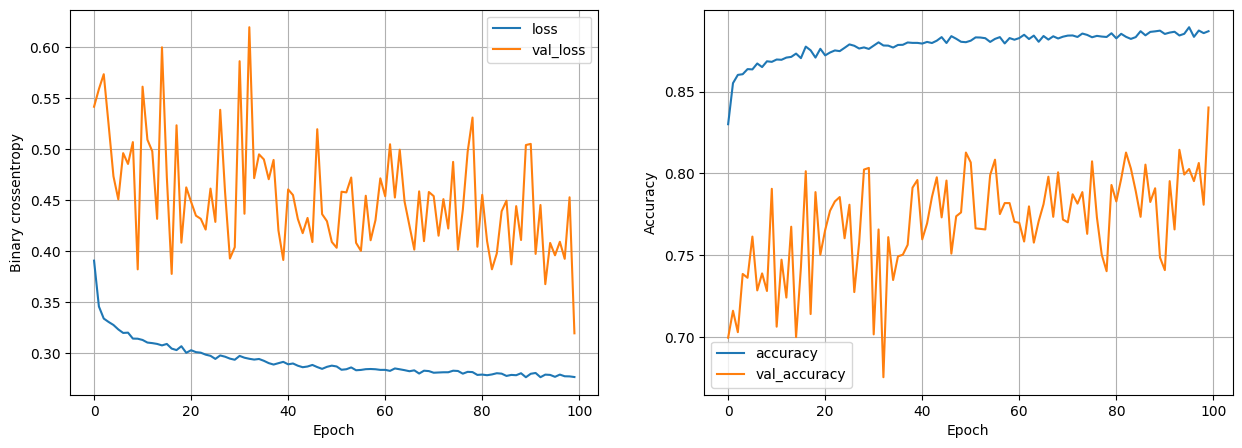

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.3522
[0.33445748686790466, 0.8617244958877563]
Nodes: 16, dropout prob: 0, lr: 0.01, batch_size: 64
Training model...
Finalized training.


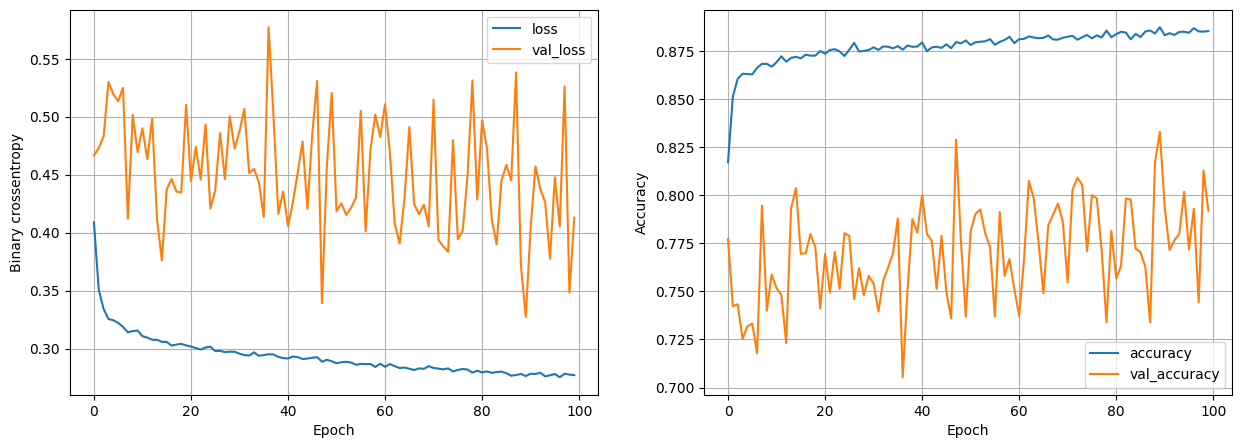

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8521 - loss: 0.3409
[0.3112543225288391, 0.8703995943069458]
Nodes: 16, dropout prob: 0, lr: 0.01, batch_size: 128
Training model...
Finalized training.


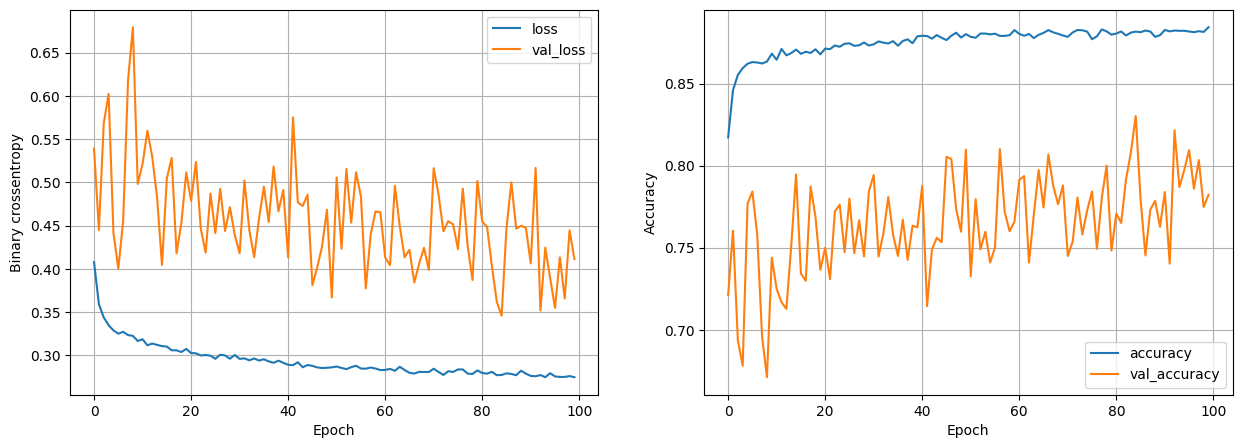

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8601 - loss: 0.3509
[0.31377437710762024, 0.8743427991867065]
Nodes: 16, dropout prob: 0, lr: 0.005, batch_size: 32
Training model...
Finalized training.


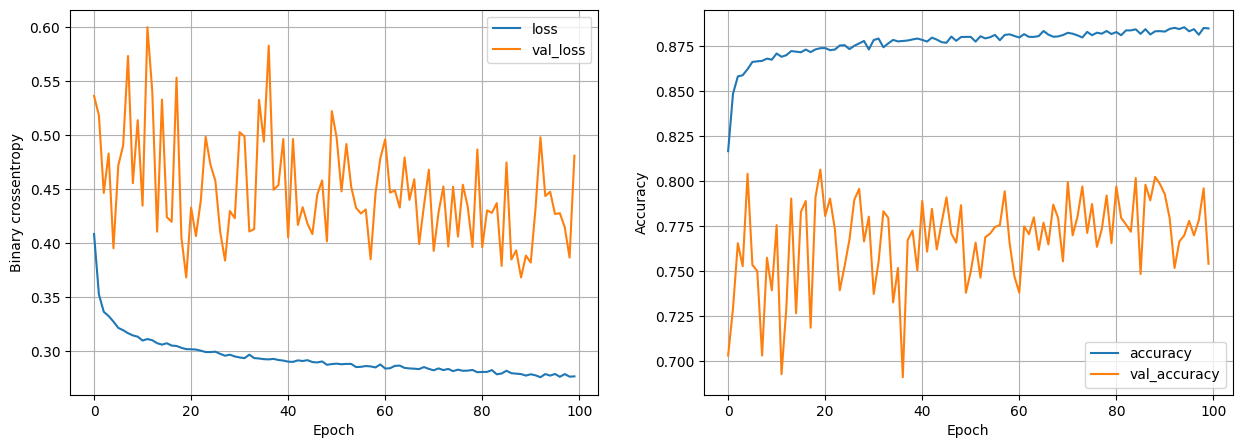

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.3327
[0.30550113320350647, 0.8751314282417297]
Nodes: 16, dropout prob: 0, lr: 0.005, batch_size: 64
Training model...
Finalized training.


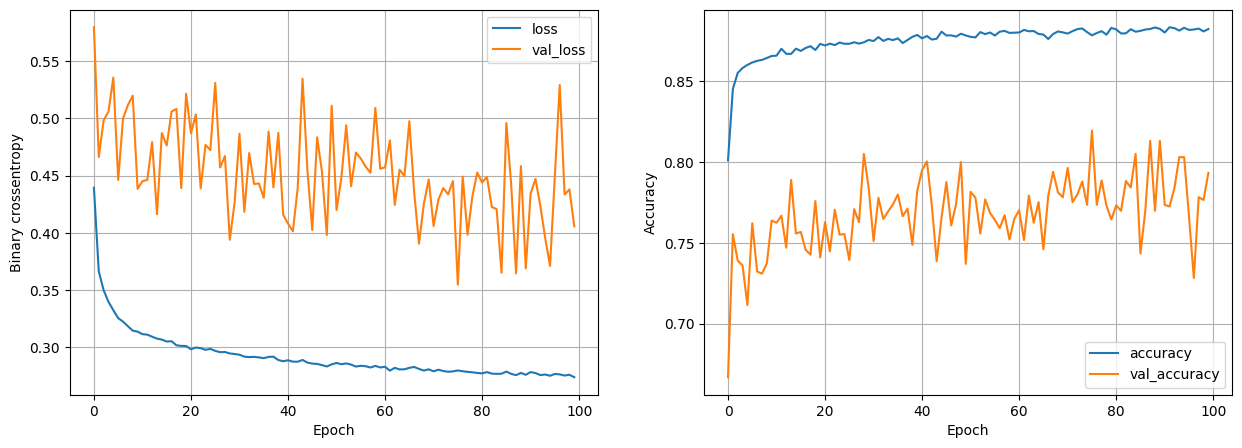

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.3320
[0.3083169162273407, 0.8717139959335327]
Nodes: 16, dropout prob: 0, lr: 0.005, batch_size: 128
Training model...
Finalized training.


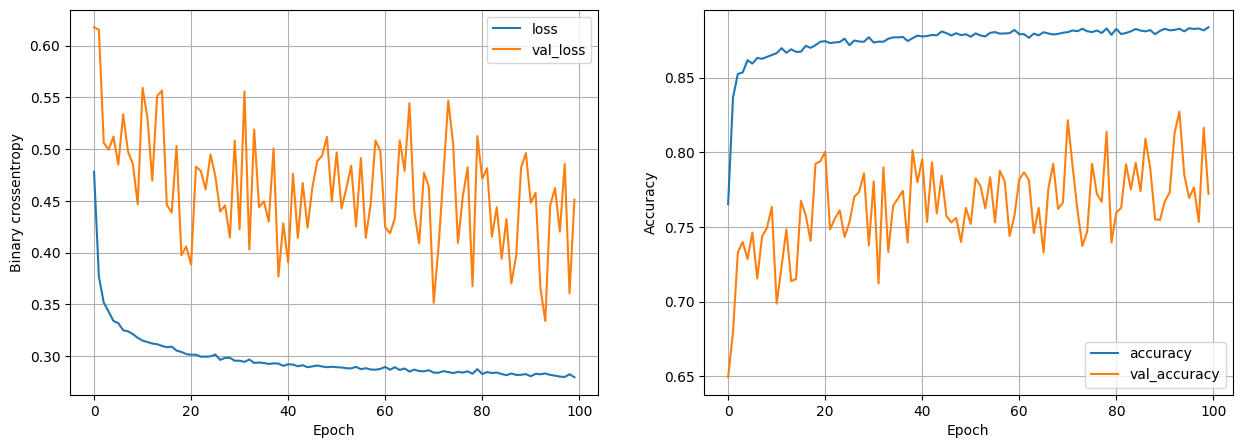

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8666 - loss: 0.3362
[0.30558547377586365, 0.8793375492095947]
Nodes: 16, dropout prob: 0, lr: 0.001, batch_size: 32
Training model...
Finalized training.


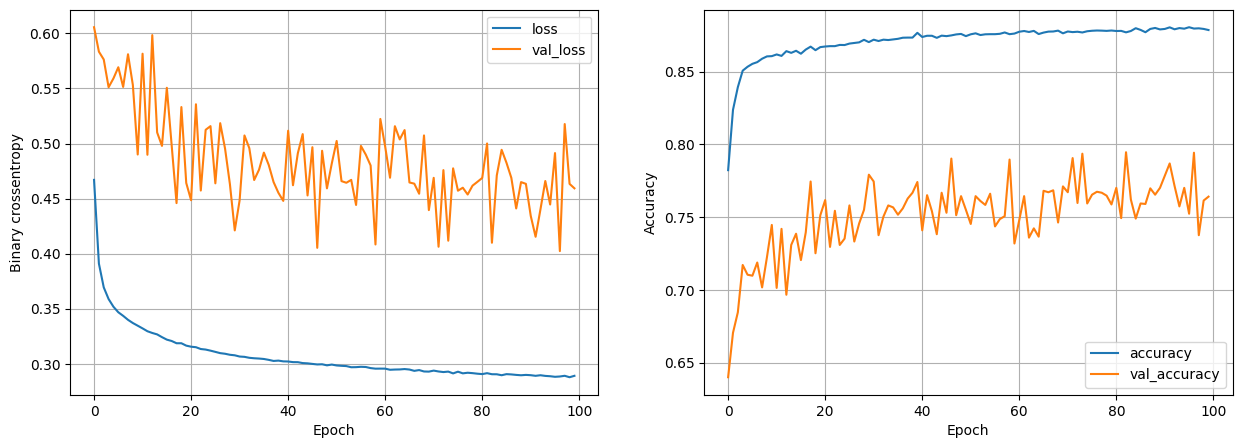

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.3331
[0.3016031086444855, 0.8843322992324829]
Nodes: 16, dropout prob: 0, lr: 0.001, batch_size: 64
Training model...
Finalized training.


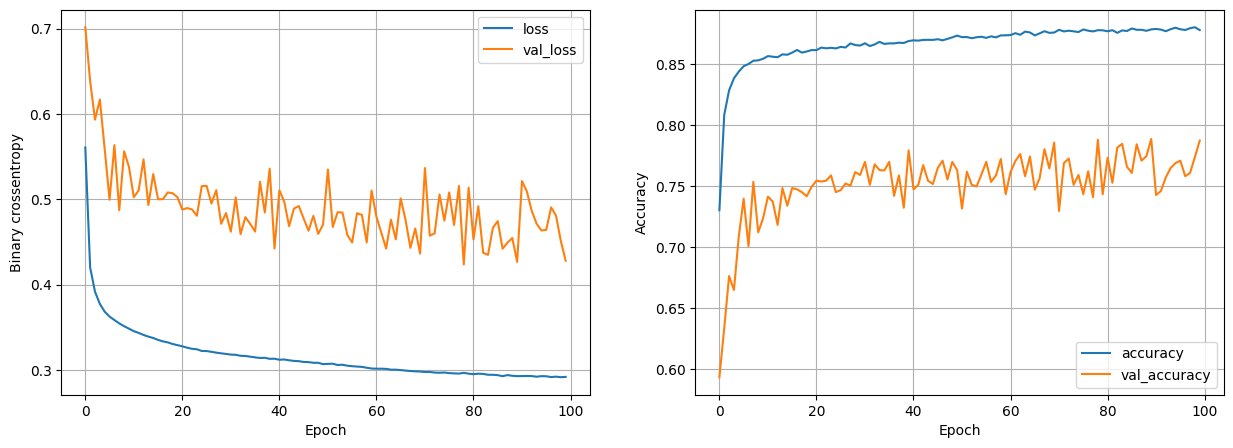

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.3210
[0.29731789231300354, 0.8764458298683167]
Nodes: 16, dropout prob: 0, lr: 0.001, batch_size: 128
Training model...
Finalized training.


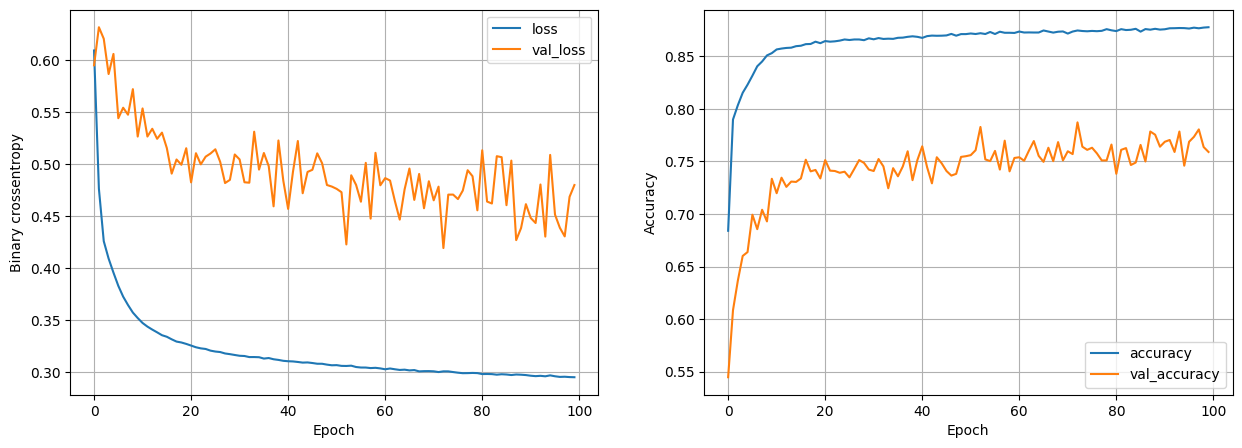

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3248
[0.2979491055011749, 0.8793375492095947]
Nodes: 16, dropout prob: 0.2, lr: 0.01, batch_size: 32
Training model...
Finalized training.


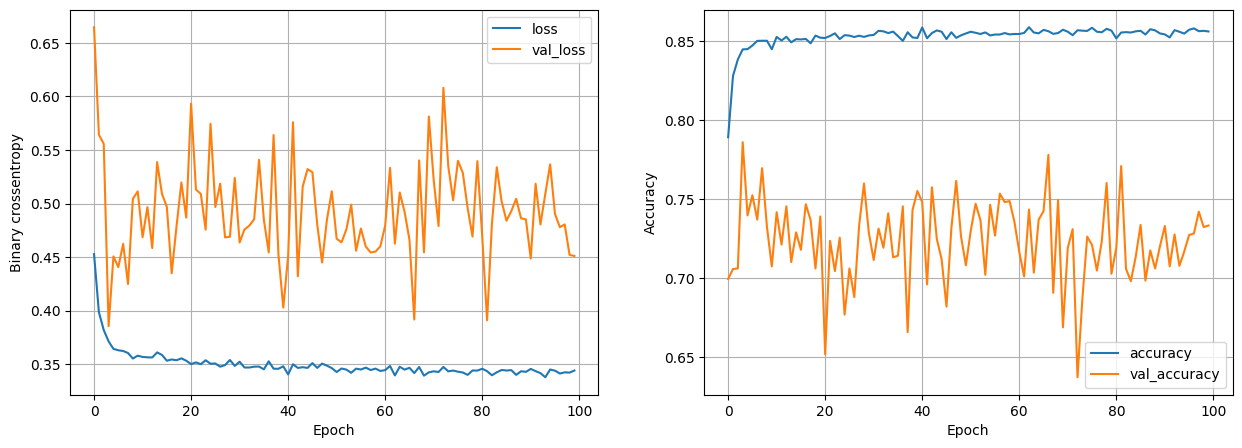

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.3417
[0.3193342089653015, 0.867770791053772]
Nodes: 16, dropout prob: 0.2, lr: 0.01, batch_size: 64
Training model...
Finalized training.


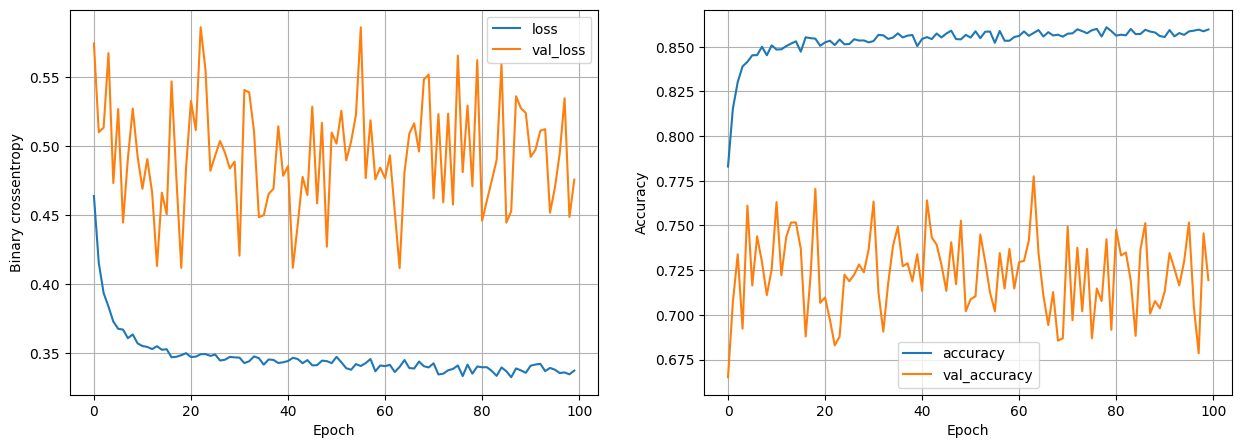

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3408
[0.31677359342575073, 0.8725026249885559]
Nodes: 16, dropout prob: 0.2, lr: 0.01, batch_size: 128
Training model...
Finalized training.


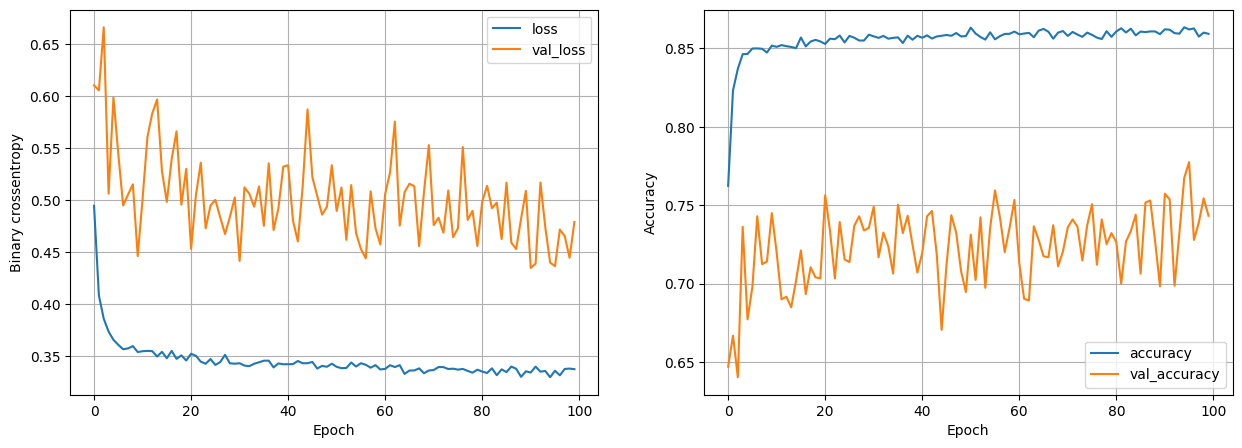

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3354
[0.3057674169540405, 0.8764458298683167]
Nodes: 16, dropout prob: 0.2, lr: 0.005, batch_size: 32
Training model...
Finalized training.


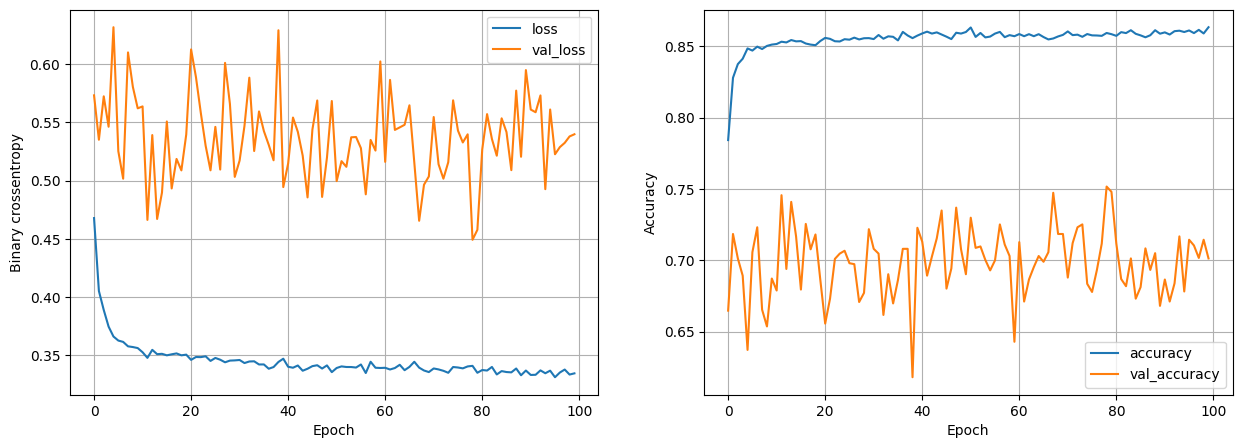

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8547 - loss: 0.3412
[0.31166791915893555, 0.8730283975601196]
Nodes: 16, dropout prob: 0.2, lr: 0.005, batch_size: 64
Training model...
Finalized training.


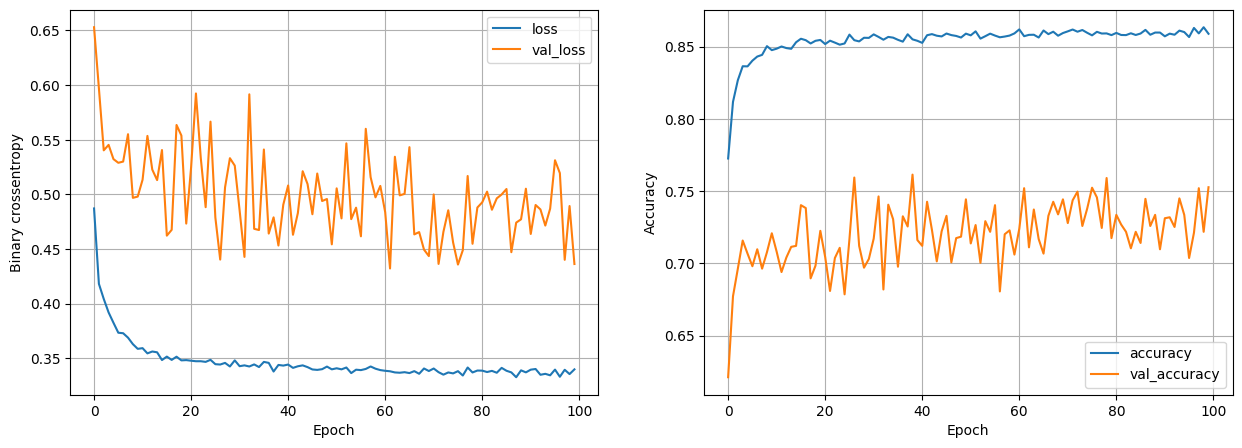

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8661 - loss: 0.3351
[0.31219998002052307, 0.8769716024398804]
Nodes: 16, dropout prob: 0.2, lr: 0.005, batch_size: 128
Training model...
Finalized training.


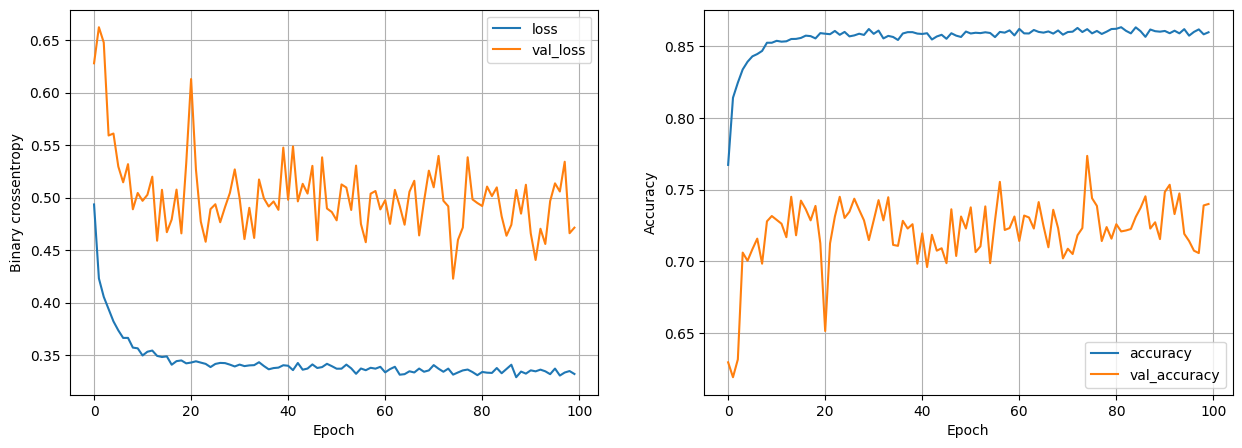

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8604 - loss: 0.3305
[0.30741405487060547, 0.8759200572967529]
Nodes: 16, dropout prob: 0.2, lr: 0.001, batch_size: 32
Training model...
Finalized training.


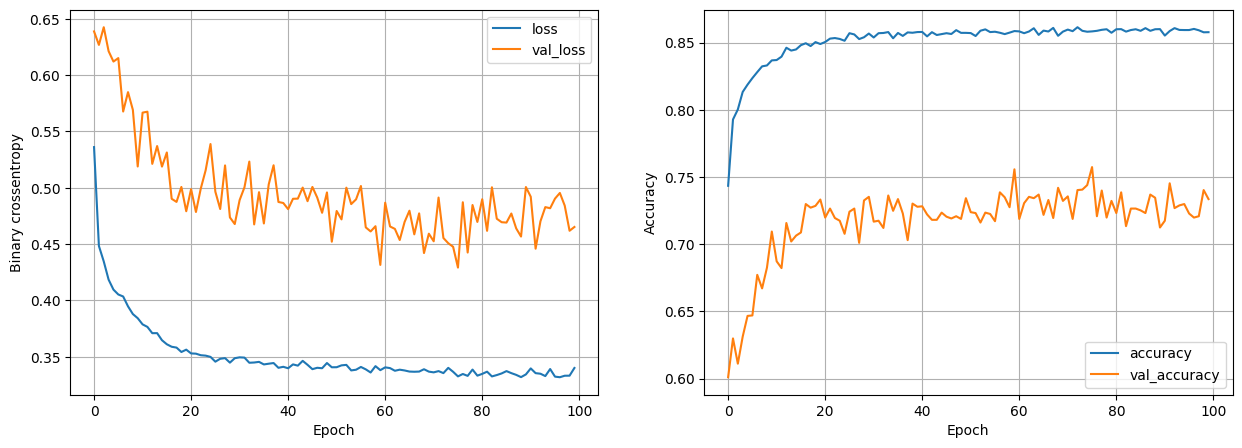

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8605 - loss: 0.3341
[0.31021982431411743, 0.8743427991867065]
Nodes: 16, dropout prob: 0.2, lr: 0.001, batch_size: 64
Training model...
Finalized training.


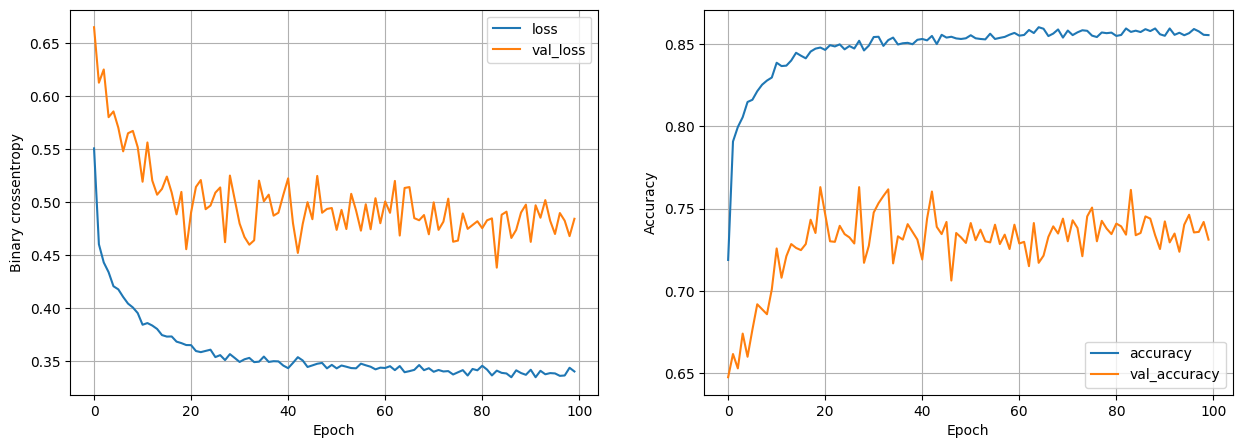

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3358
[0.31142449378967285, 0.8730283975601196]
Nodes: 16, dropout prob: 0.2, lr: 0.001, batch_size: 128
Training model...
Finalized training.


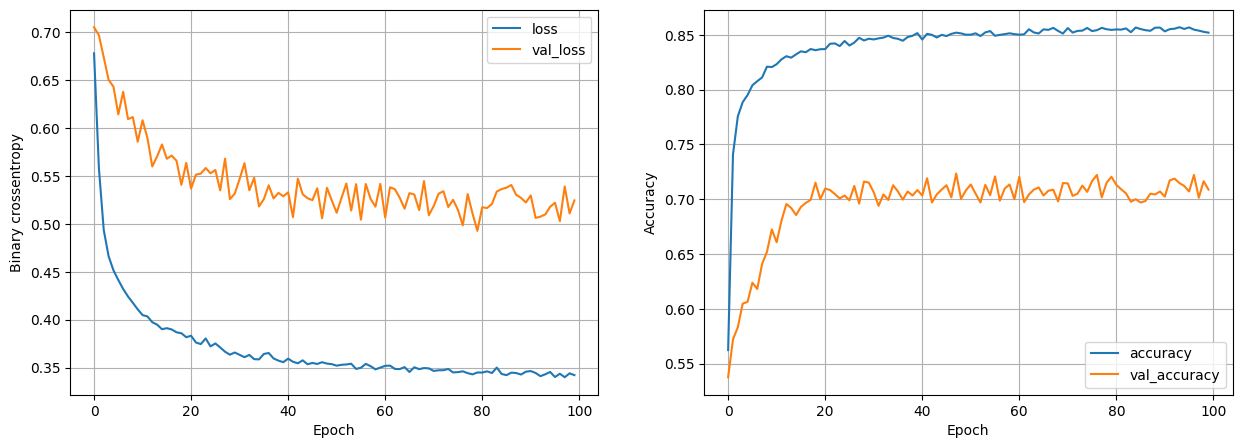

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.3377
[0.31183966994285583, 0.8725026249885559]
Nodes: 32, dropout prob: 0, lr: 0.01, batch_size: 32
Training model...
Finalized training.


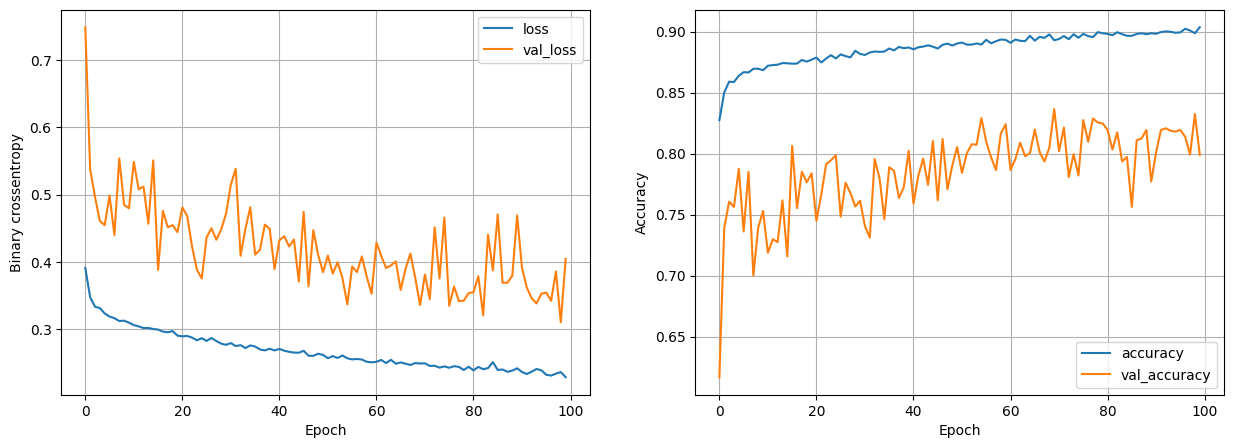

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8580 - loss: 0.3985
[0.3583502769470215, 0.875394344329834]
Nodes: 32, dropout prob: 0, lr: 0.01, batch_size: 64
Training model...
Finalized training.


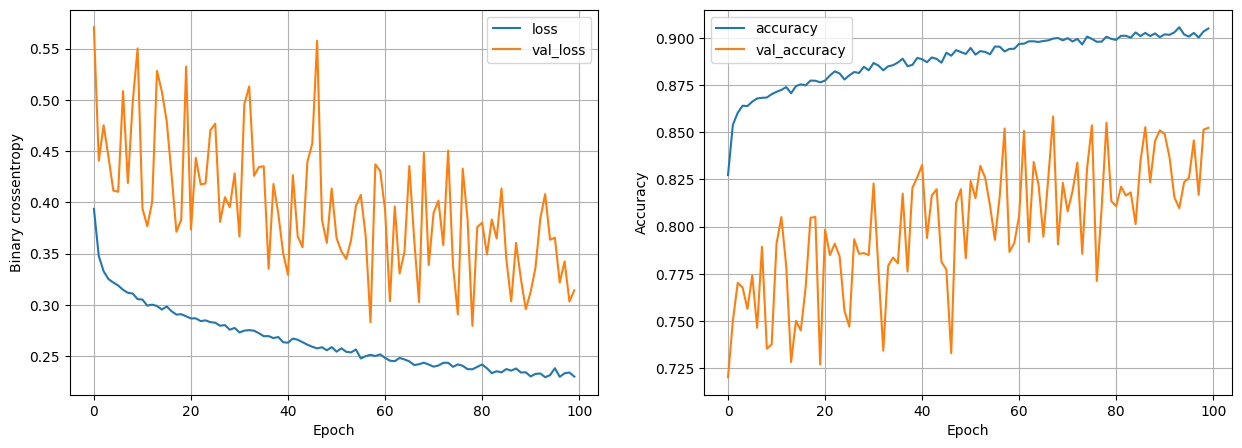

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8559 - loss: 0.4109
[0.38030511140823364, 0.8656677007675171]
Nodes: 32, dropout prob: 0, lr: 0.01, batch_size: 128
Training model...
Finalized training.


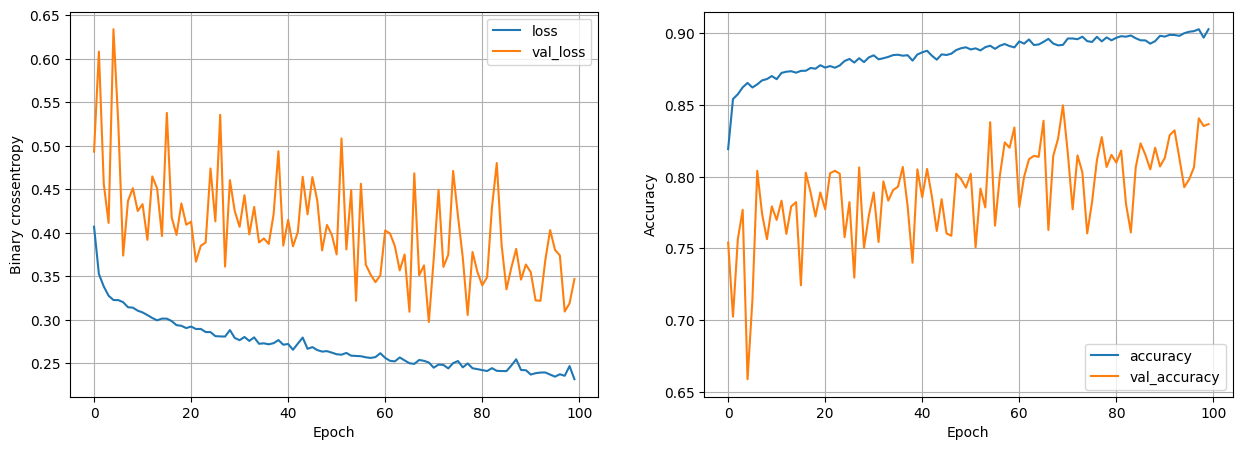

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8610 - loss: 0.3907
[0.3531980812549591, 0.8693480491638184]
Nodes: 32, dropout prob: 0, lr: 0.005, batch_size: 32
Training model...
Finalized training.


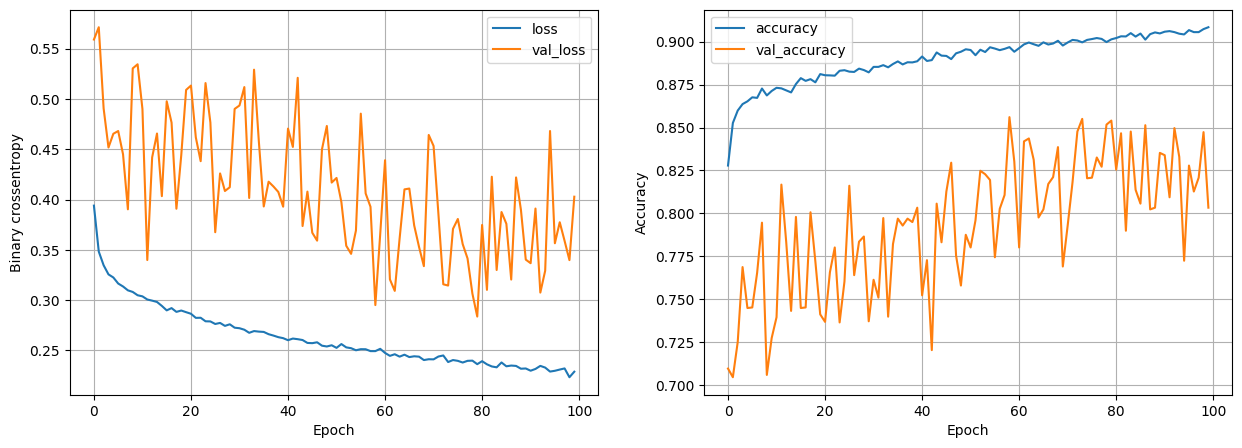

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8498 - loss: 0.3907
[0.3530668020248413, 0.8654048442840576]
Nodes: 32, dropout prob: 0, lr: 0.005, batch_size: 64
Training model...
Finalized training.


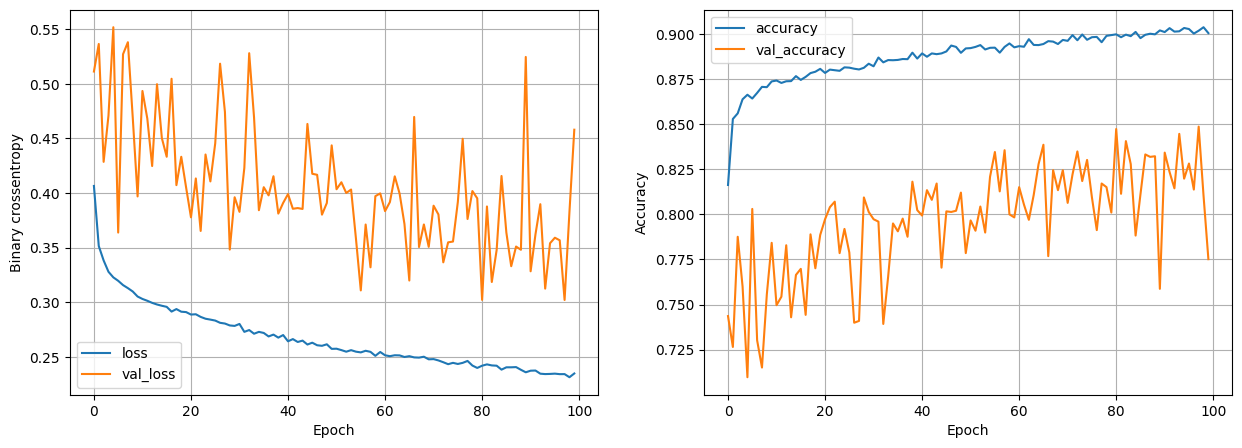

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.3782
[0.3453315794467926, 0.8706624507904053]
Nodes: 32, dropout prob: 0, lr: 0.005, batch_size: 128
Training model...
Finalized training.


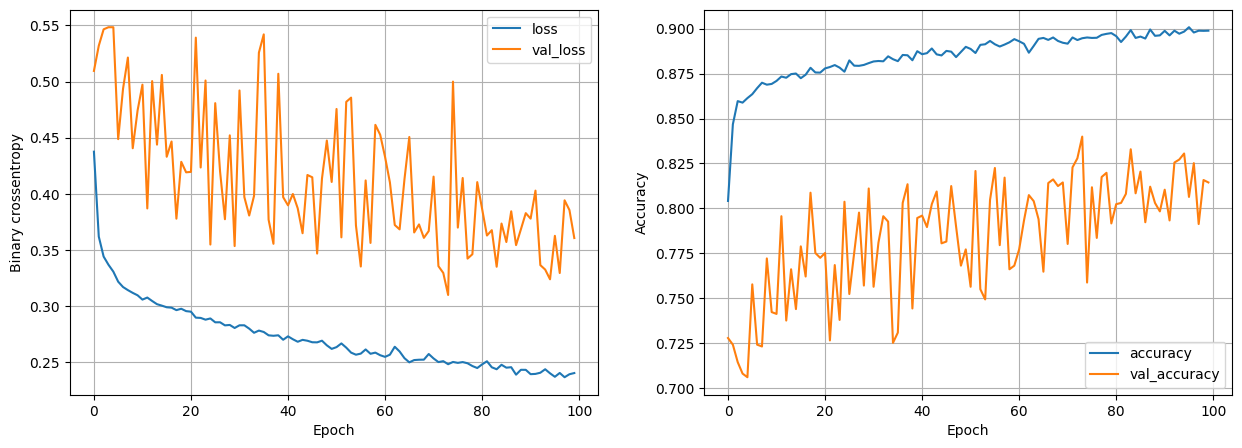

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3662
[0.3381449580192566, 0.8667192459106445]
Nodes: 32, dropout prob: 0, lr: 0.001, batch_size: 32
Training model...
Finalized training.


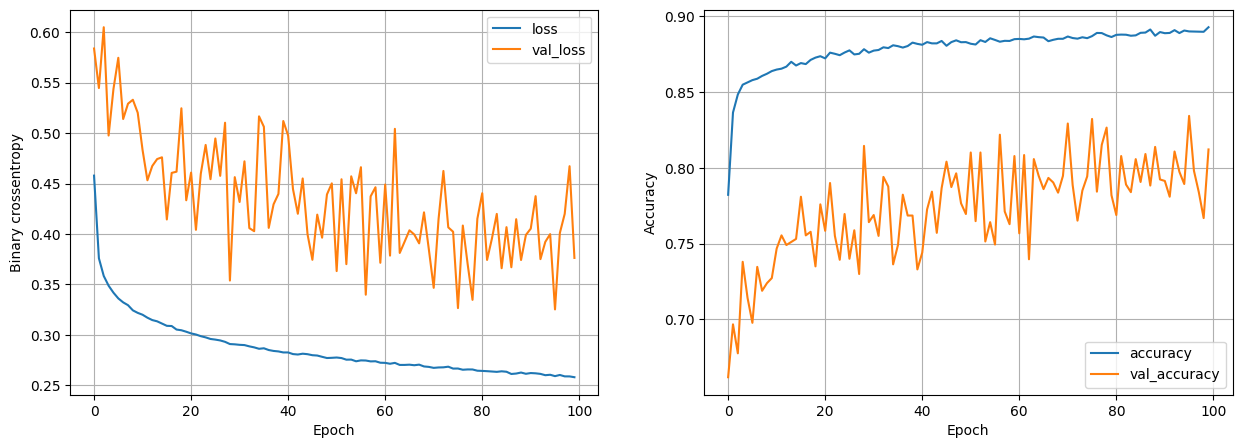

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8631 - loss: 0.3430
[0.31197306513786316, 0.8759200572967529]
Nodes: 32, dropout prob: 0, lr: 0.001, batch_size: 64
Training model...
Finalized training.


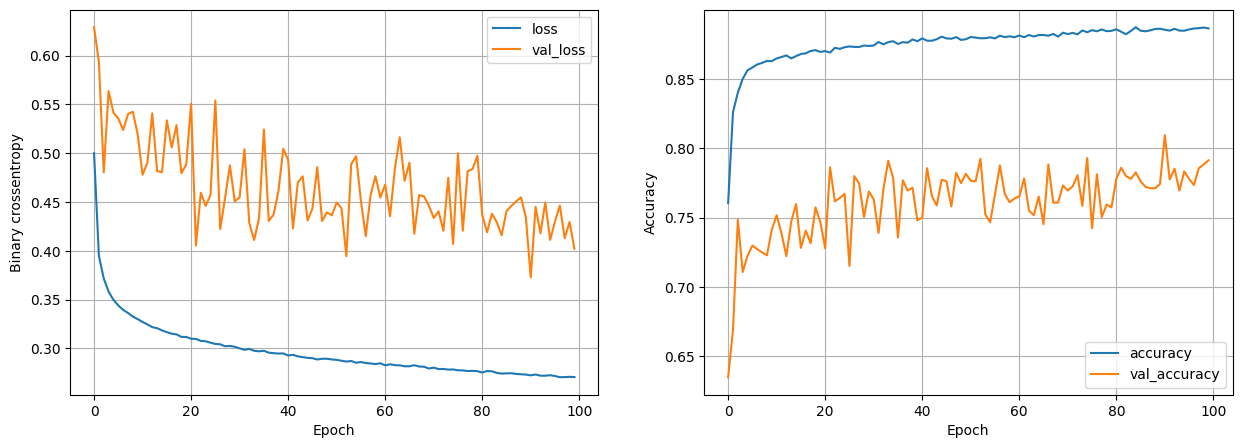

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.3298
[0.30319690704345703, 0.8782860040664673]
Nodes: 32, dropout prob: 0, lr: 0.001, batch_size: 128
Training model...
Finalized training.


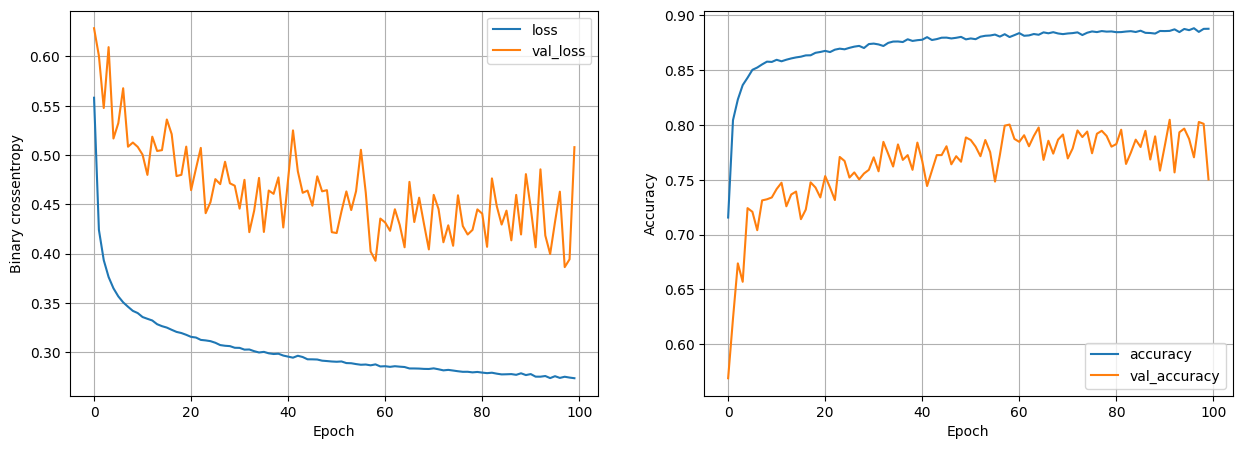

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.3324
[0.3057515323162079, 0.8706624507904053]
Nodes: 32, dropout prob: 0.2, lr: 0.01, batch_size: 32
Training model...
Finalized training.


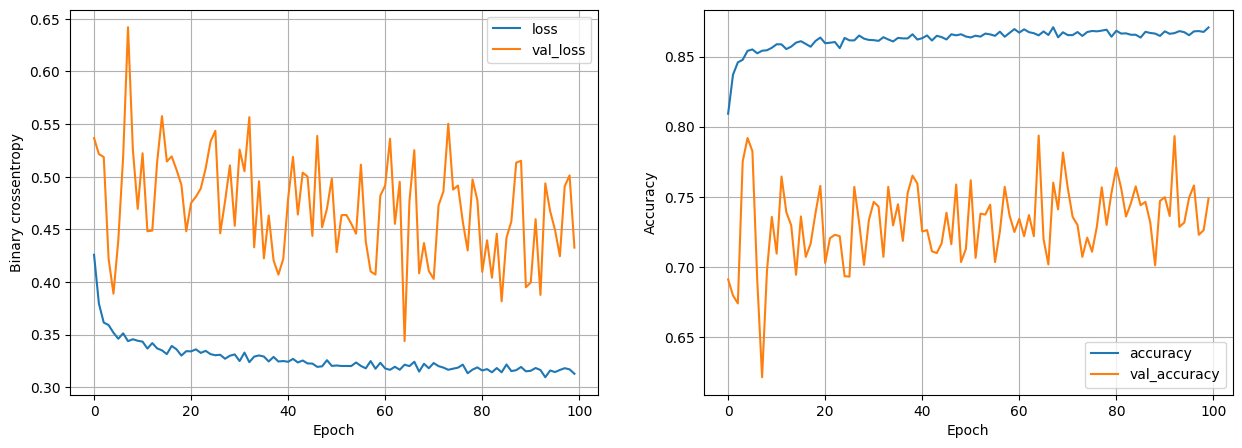

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8674 - loss: 0.3308
[0.3074864447116852, 0.878811776638031]
Nodes: 32, dropout prob: 0.2, lr: 0.01, batch_size: 64
Training model...
Finalized training.


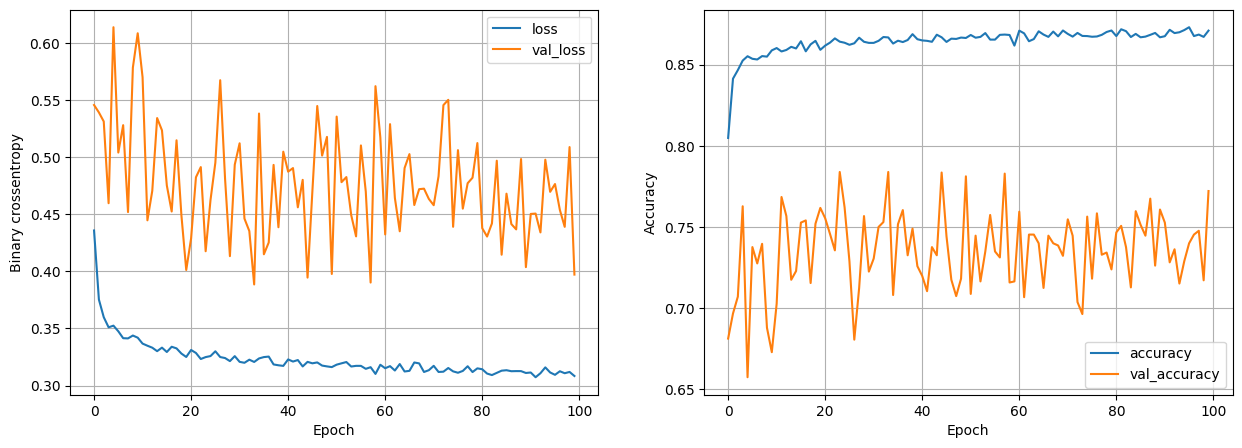

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8625 - loss: 0.3293
[0.3028387427330017, 0.8756572008132935]
Nodes: 32, dropout prob: 0.2, lr: 0.01, batch_size: 128
Training model...
Finalized training.


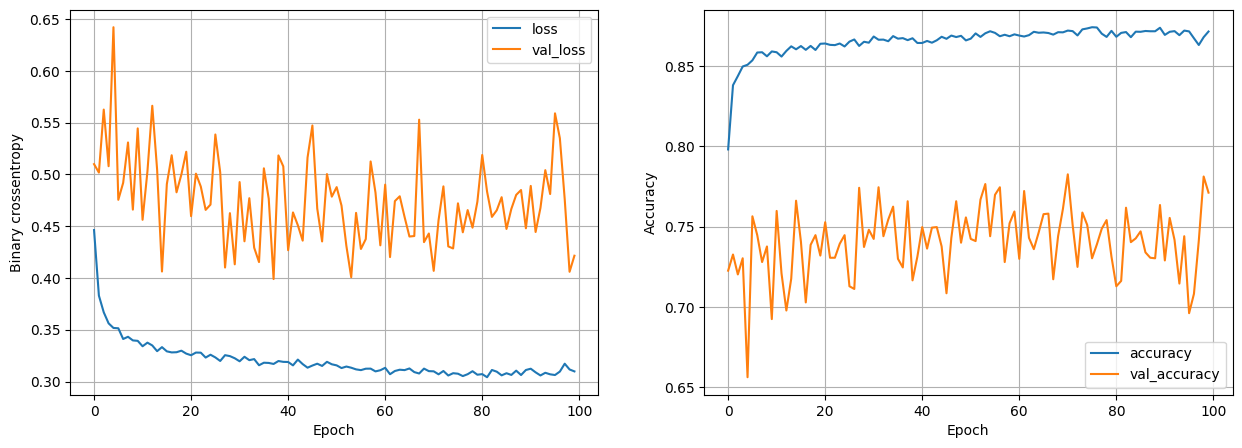

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8684 - loss: 0.3205
[0.295726478099823, 0.8798633217811584]
Nodes: 32, dropout prob: 0.2, lr: 0.005, batch_size: 32
Training model...
Finalized training.


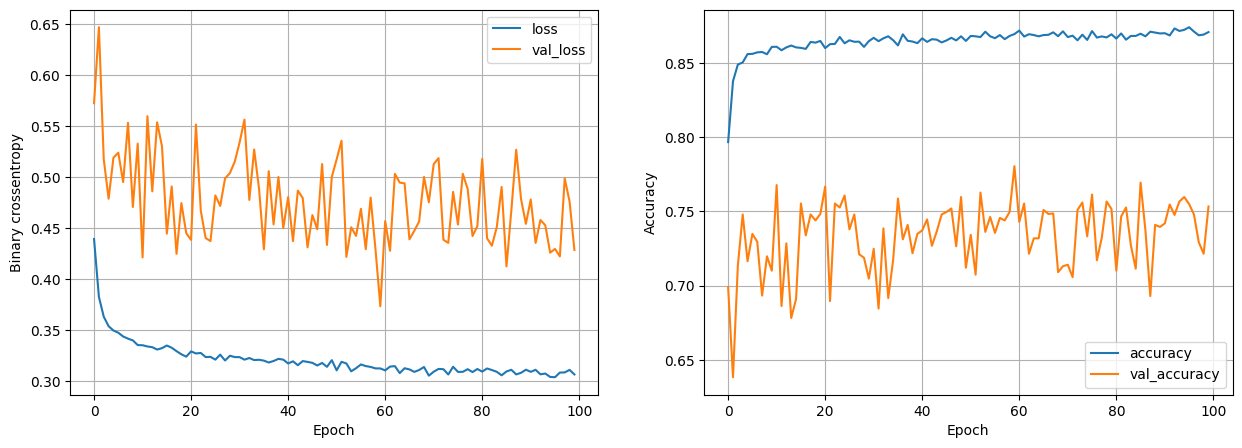

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8655 - loss: 0.3212
[0.29723164439201355, 0.8780231475830078]
Nodes: 32, dropout prob: 0.2, lr: 0.005, batch_size: 64
Training model...
Finalized training.


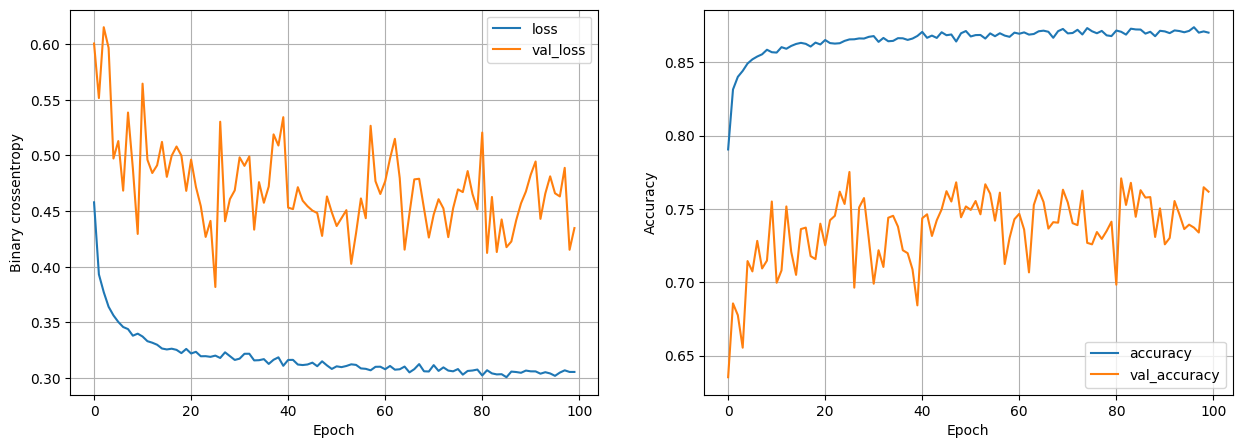

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8695 - loss: 0.3246
[0.2928171753883362, 0.8819663524627686]
Nodes: 32, dropout prob: 0.2, lr: 0.005, batch_size: 128
Training model...
Finalized training.


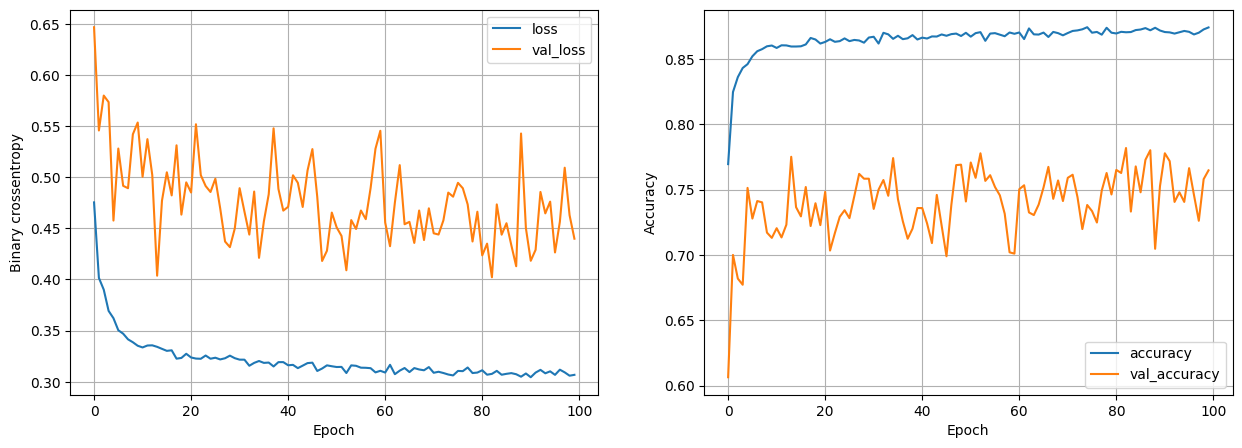

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8631 - loss: 0.3256
[0.3000074326992035, 0.8785489201545715]
Nodes: 32, dropout prob: 0.2, lr: 0.001, batch_size: 32
Training model...
Finalized training.


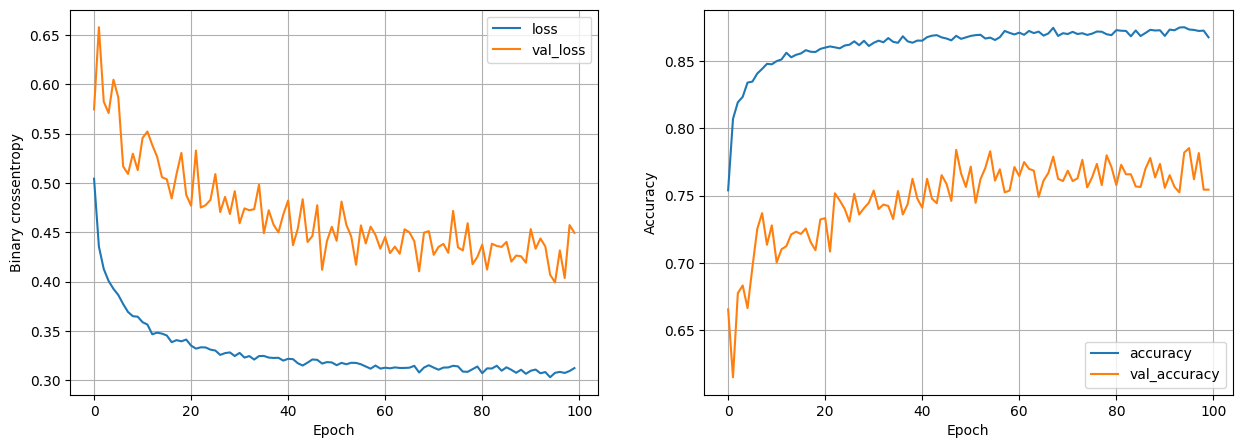

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8622 - loss: 0.3263
[0.2967378497123718, 0.8767087459564209]
Nodes: 32, dropout prob: 0.2, lr: 0.001, batch_size: 64
Training model...
Finalized training.


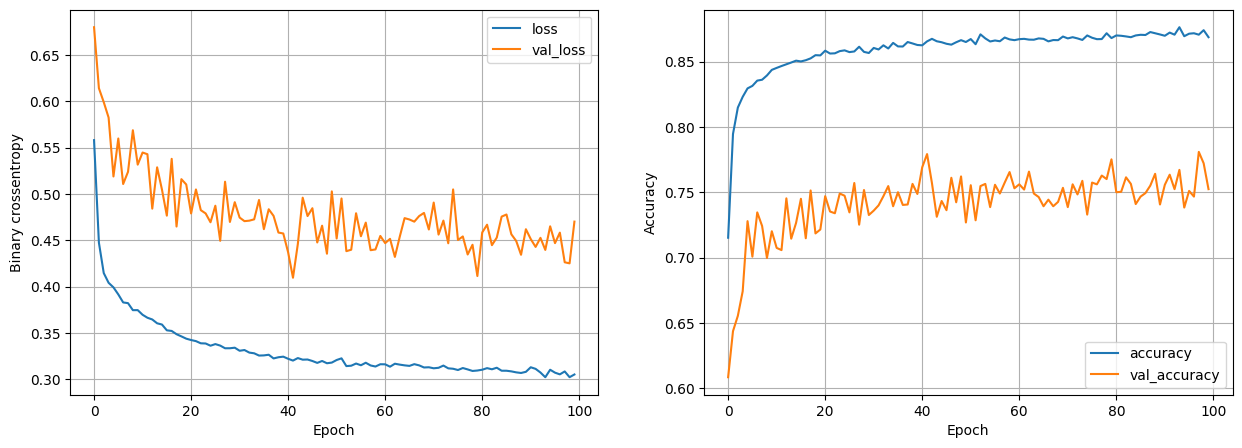

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8609 - loss: 0.3251
[0.2944824695587158, 0.8761829733848572]
Nodes: 32, dropout prob: 0.2, lr: 0.001, batch_size: 128
Training model...
Finalized training.


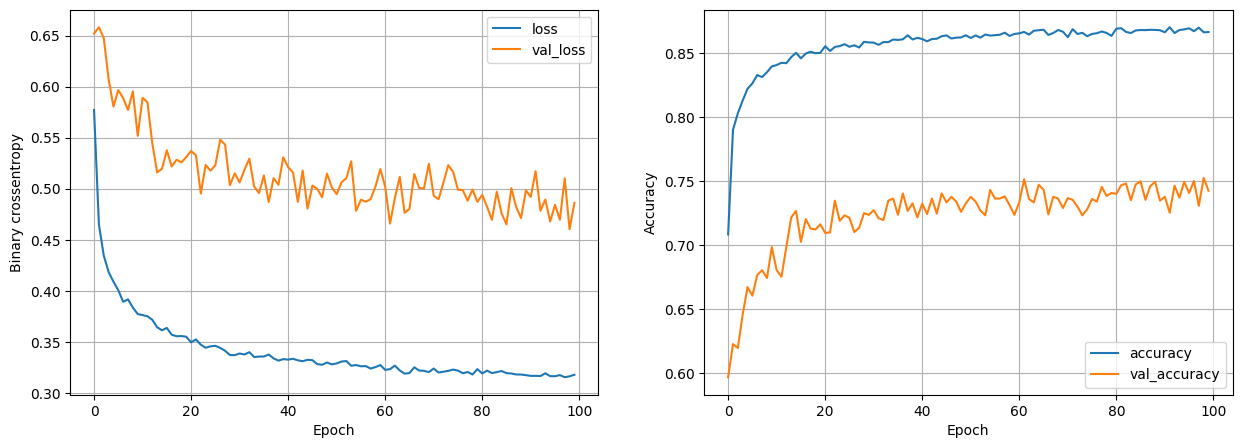

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8667 - loss: 0.3244
[0.29678216576576233, 0.8803890347480774]
Nodes: 64, dropout prob: 0, lr: 0.01, batch_size: 32
Training model...
Finalized training.


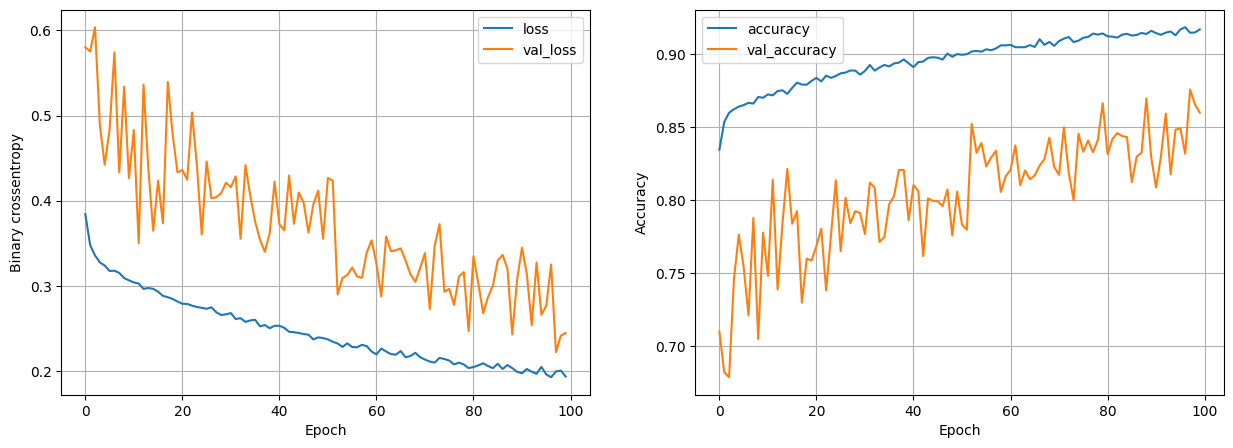

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8502 - loss: 0.4730
[0.43829455971717834, 0.8611987233161926]
Nodes: 64, dropout prob: 0, lr: 0.01, batch_size: 64
Training model...
Finalized training.


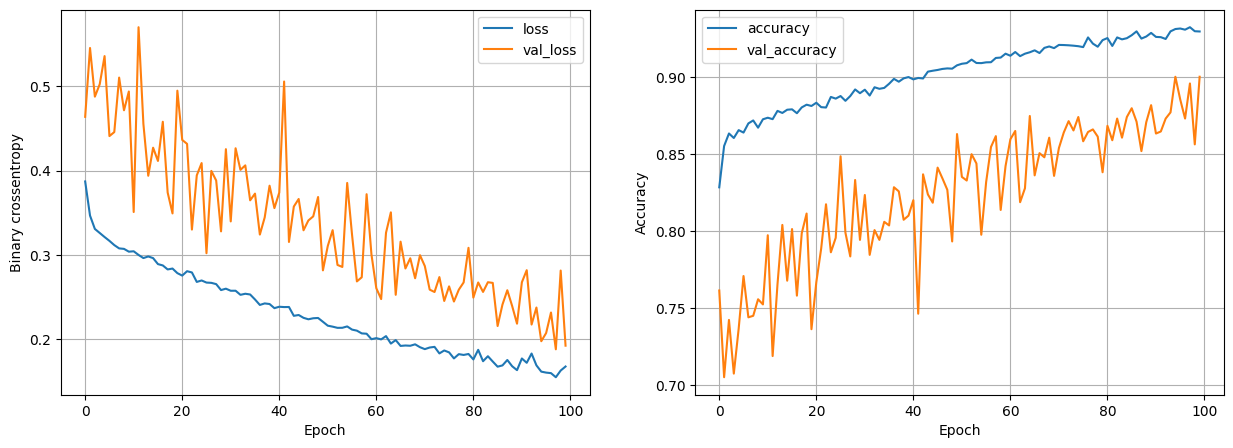

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8477 - loss: 0.5566
[0.5194570422172546, 0.8535751700401306]
Nodes: 64, dropout prob: 0, lr: 0.01, batch_size: 128
Training model...
Finalized training.


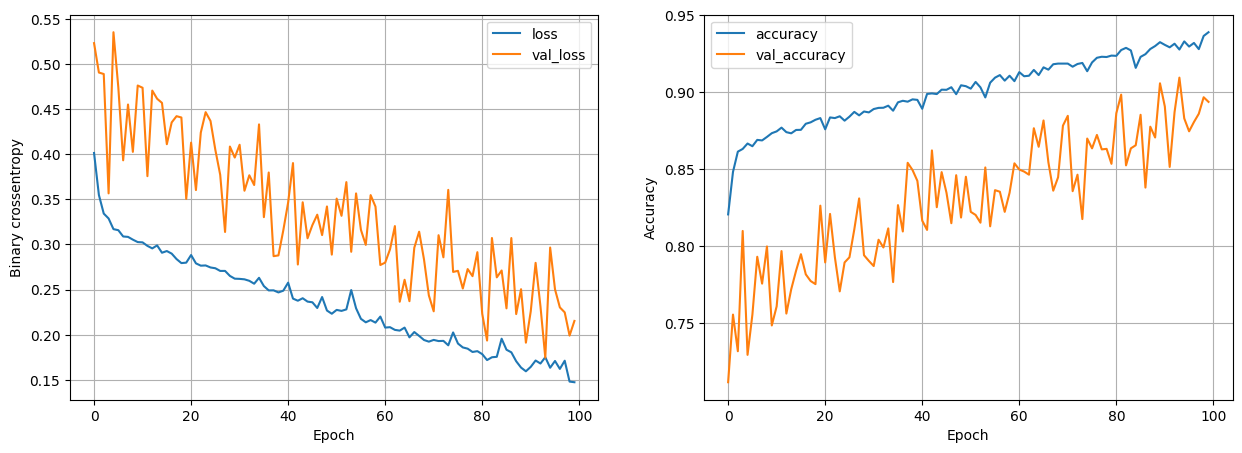

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8473 - loss: 0.5598
[0.5135967135429382, 0.8572555184364319]
Nodes: 64, dropout prob: 0, lr: 0.005, batch_size: 32
Training model...
Finalized training.


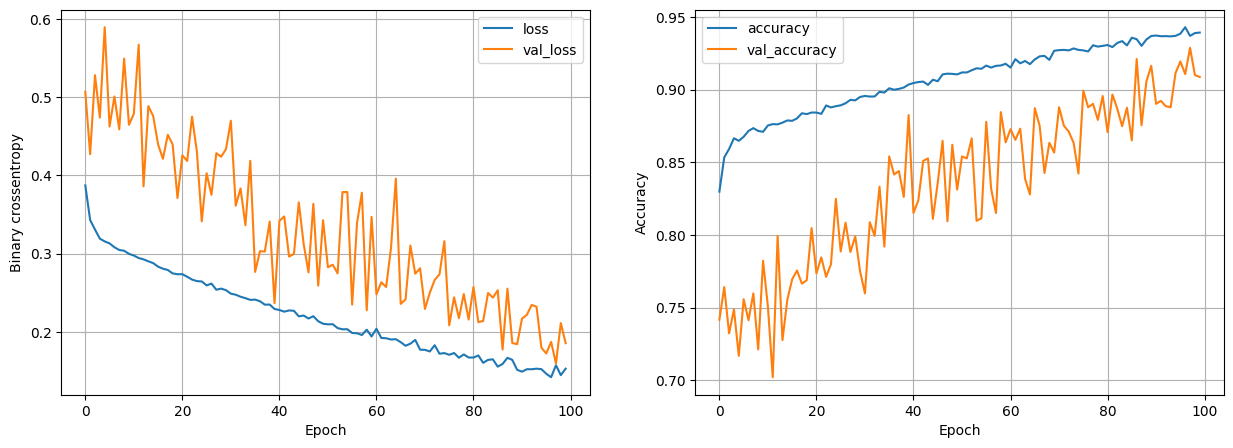

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8402 - loss: 0.6646
[0.5777037739753723, 0.8535751700401306]
Nodes: 64, dropout prob: 0, lr: 0.005, batch_size: 64
Training model...
Finalized training.


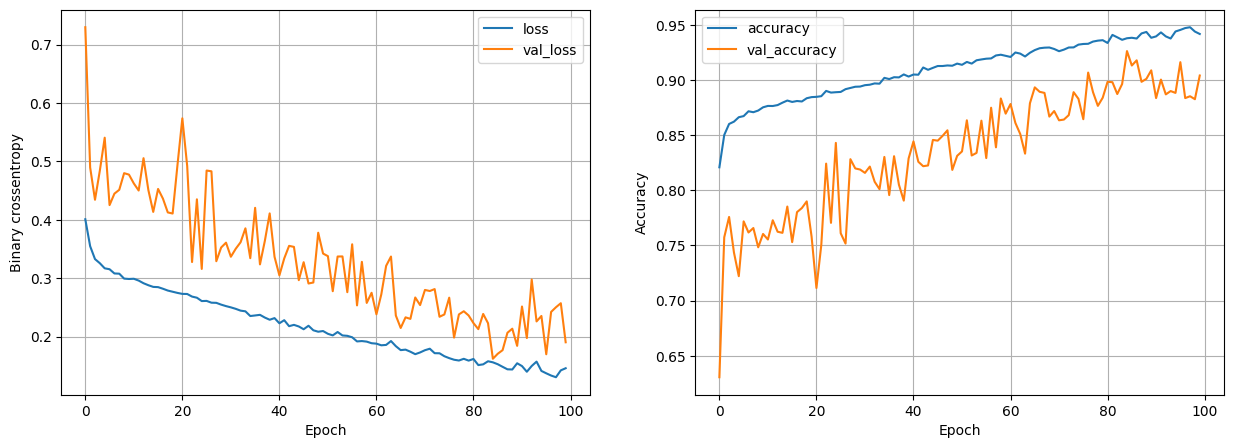

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8327 - loss: 0.6176
[0.5469591021537781, 0.8493691086769104]
Nodes: 64, dropout prob: 0, lr: 0.005, batch_size: 128
Training model...
Finalized training.


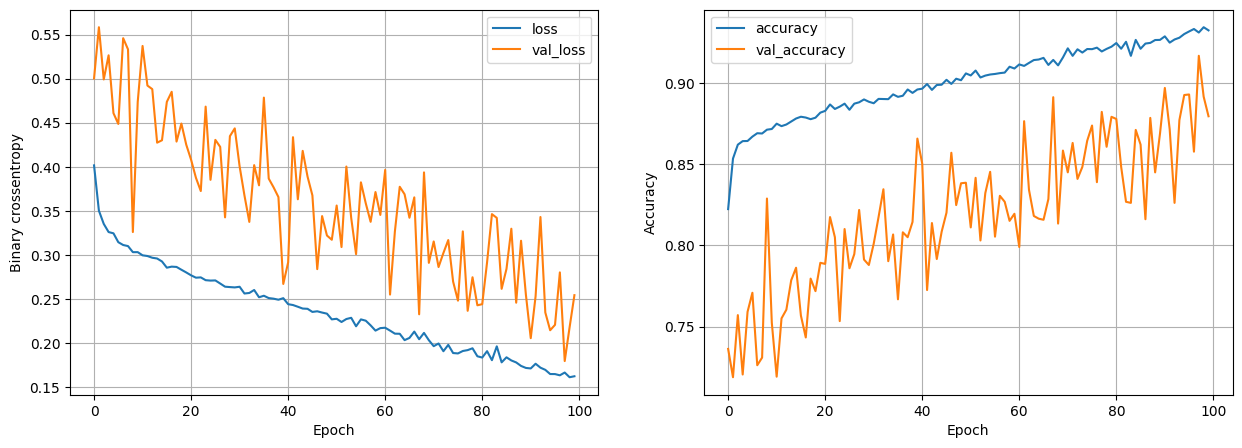

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8495 - loss: 0.5072
[0.47504210472106934, 0.8580441474914551]
Nodes: 64, dropout prob: 0, lr: 0.001, batch_size: 32
Training model...
Finalized training.


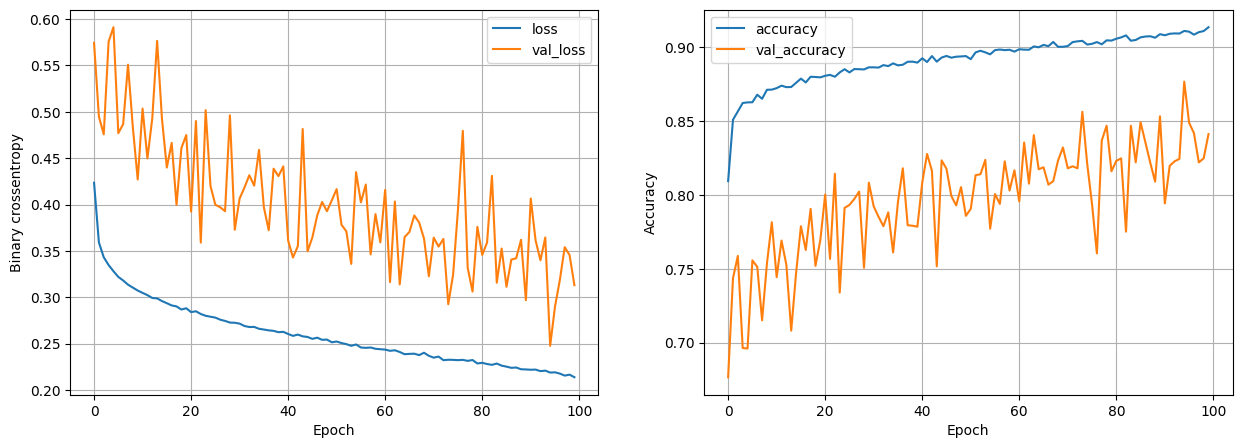

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8496 - loss: 0.3733
[0.3398173749446869, 0.86014723777771]
Nodes: 64, dropout prob: 0, lr: 0.001, batch_size: 64
Training model...
Finalized training.


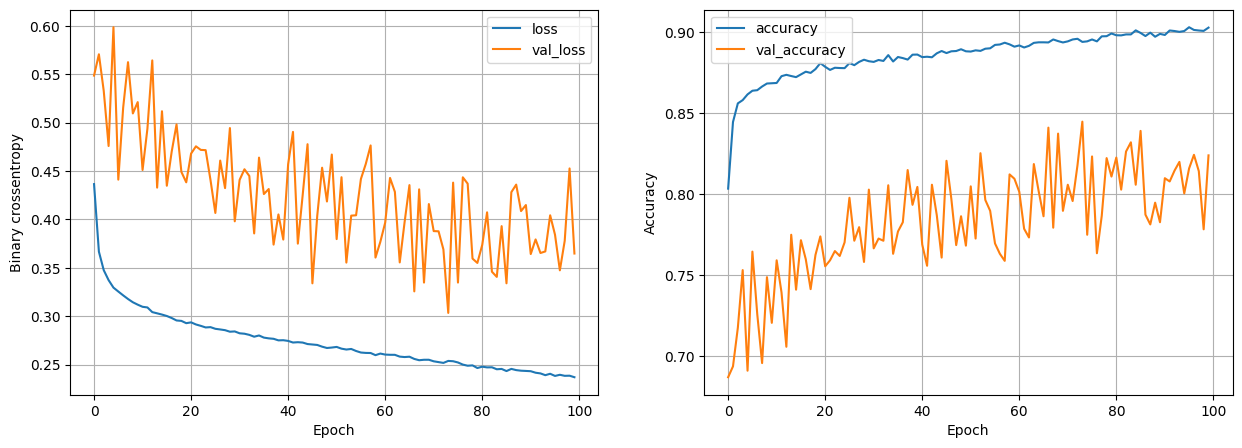

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3435
[0.3163965940475464, 0.8740799427032471]
Nodes: 64, dropout prob: 0, lr: 0.001, batch_size: 128
Training model...
Finalized training.


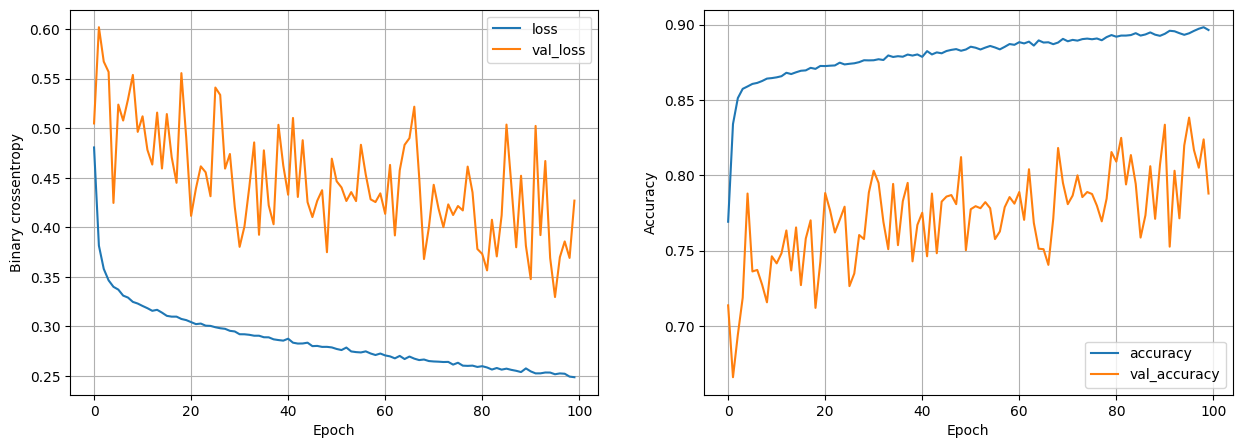

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8725 - loss: 0.3317
[0.3022937476634979, 0.8824921250343323]
Nodes: 64, dropout prob: 0.2, lr: 0.01, batch_size: 32
Training model...
Finalized training.


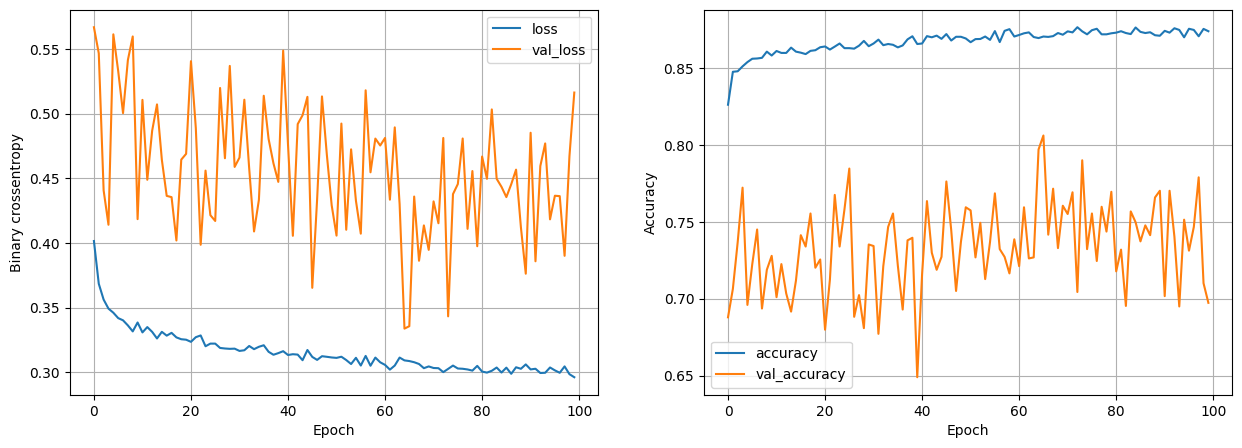

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8620 - loss: 0.3358
[0.30541351437568665, 0.8730283975601196]
Nodes: 64, dropout prob: 0.2, lr: 0.01, batch_size: 64
Training model...
Finalized training.


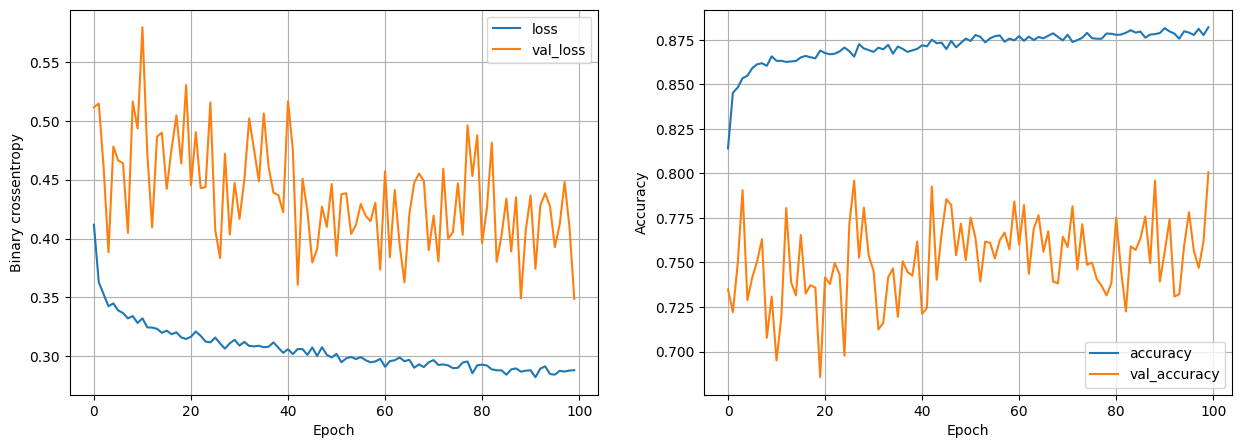

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8680 - loss: 0.3317
[0.3022254407405853, 0.8793375492095947]
Nodes: 64, dropout prob: 0.2, lr: 0.01, batch_size: 128
Training model...
Finalized training.


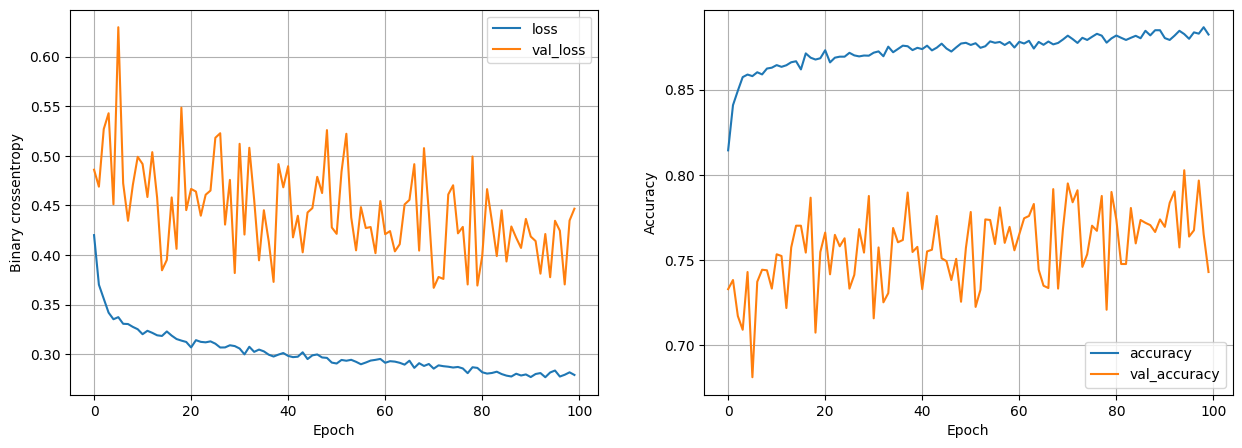

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8664 - loss: 0.3240
[0.2950206696987152, 0.878811776638031]
Nodes: 64, dropout prob: 0.2, lr: 0.005, batch_size: 32
Training model...
Finalized training.


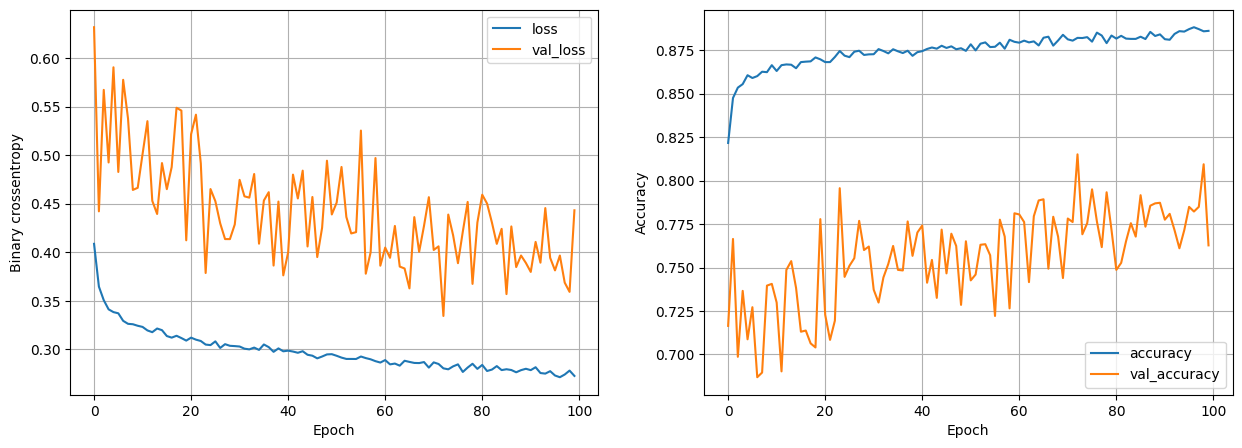

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8607 - loss: 0.3358
[0.30346259474754333, 0.8767087459564209]
Nodes: 64, dropout prob: 0.2, lr: 0.005, batch_size: 64
Training model...
Finalized training.


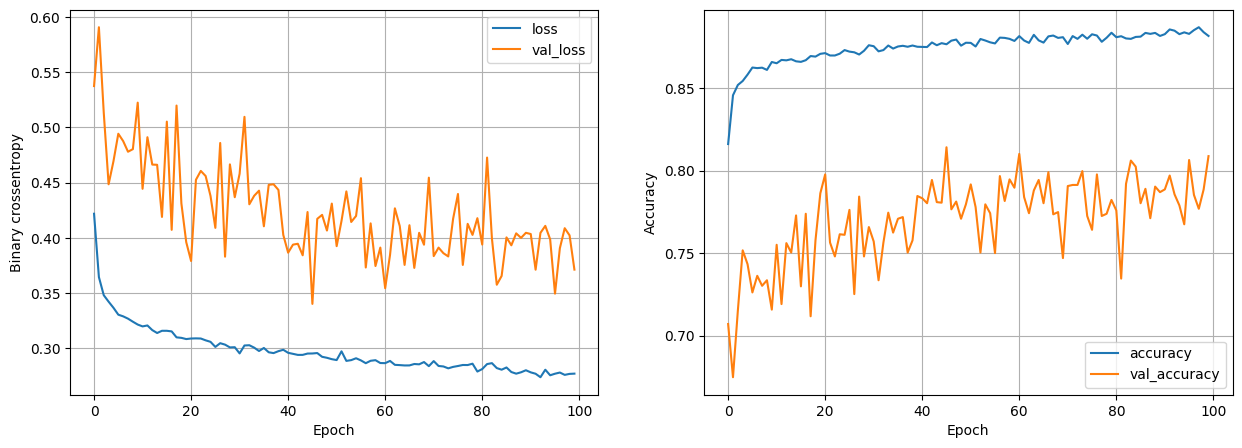

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.3181
[0.2915230989456177, 0.8811777234077454]
Nodes: 64, dropout prob: 0.2, lr: 0.005, batch_size: 128
Training model...
Finalized training.


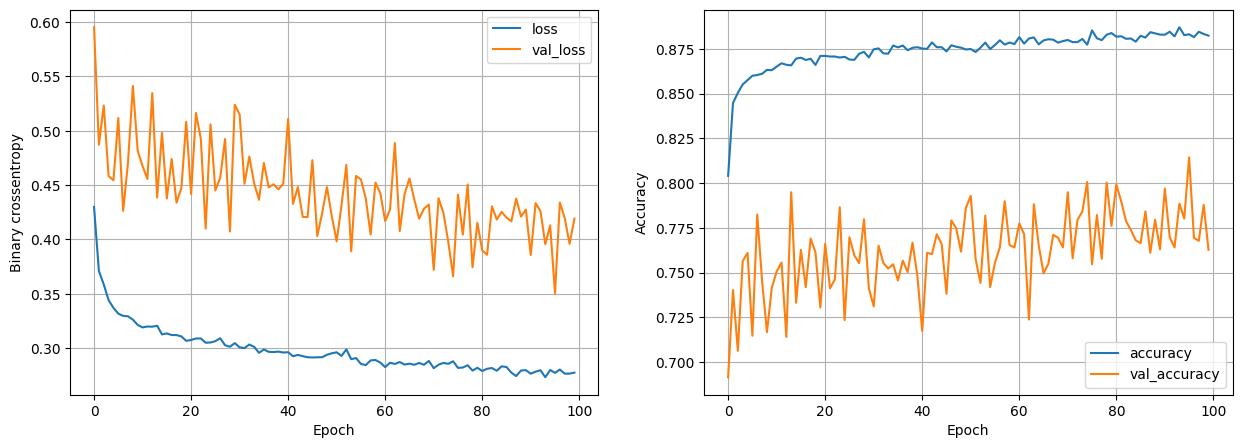

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8649 - loss: 0.3236
[0.29567575454711914, 0.878811776638031]
Nodes: 64, dropout prob: 0.2, lr: 0.001, batch_size: 32
Training model...
Finalized training.


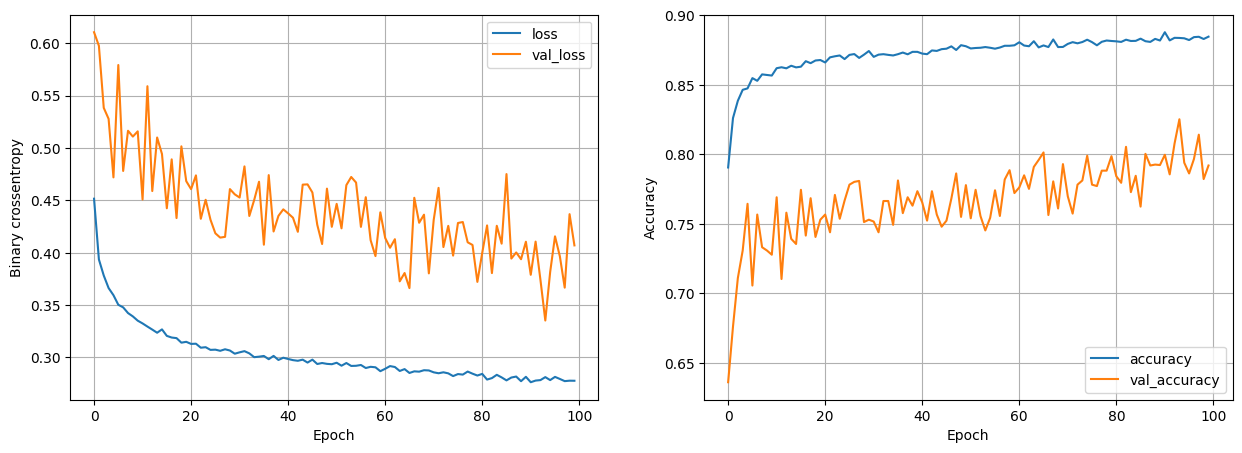

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8667 - loss: 0.3157
[0.28851935267448425, 0.8790746331214905]
Nodes: 64, dropout prob: 0.2, lr: 0.001, batch_size: 64
Training model...
Finalized training.


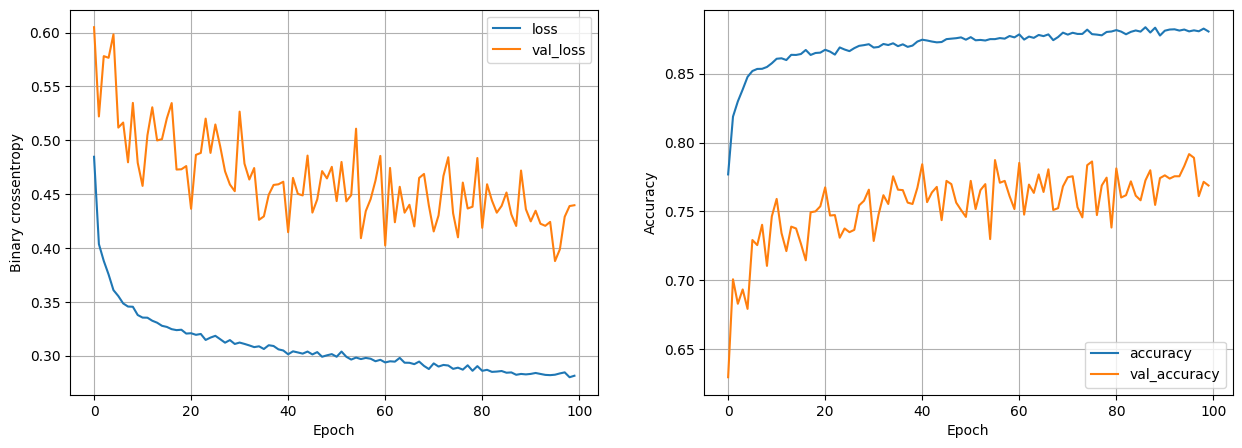

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.3210
[0.29044634103775024, 0.882229208946228]
Nodes: 64, dropout prob: 0.2, lr: 0.001, batch_size: 128
Training model...
Finalized training.


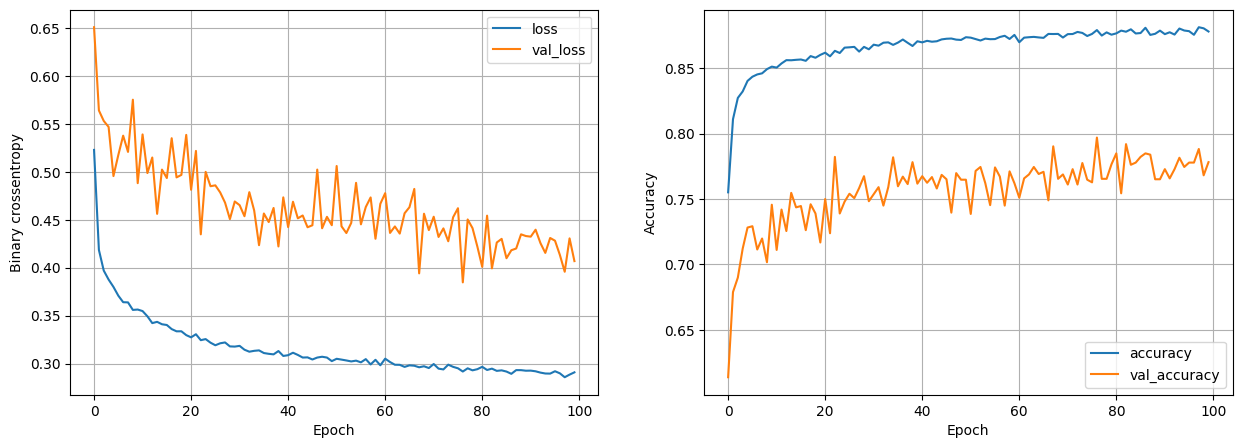

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8692 - loss: 0.3133
[0.2879984378814697, 0.8814405798912048]


In [26]:
least_val_loss = float("inf")
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"Nodes: {num_nodes}, dropout prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)
        print(val_loss)
        if val_loss[0] < least_val_loss:
          least_val_loss = val_loss[0]
          least_loss_model = model

In [27]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, )
print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1369
           1       0.88      0.93      0.90      2435

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804

